<a href="https://colab.research.google.com/github/Tharun4277g/SolarPanelPowerPrediction/blob/main/SOLAR_PANEL_POWER_PROJECTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')
#'/content/drive/MyDrive/Plant_2_Generation_Data.csv'

In [13]:
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')
#'/content/drive/MyDrive/Plant_2_Weather_Sensor_Data.csv'

In [14]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    }
)


In [15]:
import pandas as pd

# Assuming 'df' is your DataFrame
num_rows, num_cols = generation_data.shape

print("Total number of rows:", num_rows)
print("Total number of columns:", num_cols)

Total number of rows: 67698
Total number of columns: 7


In [16]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })


In [17]:
import pandas as pd

# Assuming 'df' is your DataFrame
num_rows, num_cols = weather_data.shape

print("Total number of rows:", num_rows)
print("Total number of columns:", num_cols)

Total number of rows: 3259
Total number of columns: 6


In [18]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='mixed', dayfirst=True)
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='mixed', dayfirst=True)


In [19]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(15).style.background_gradient(cmap='cool')

In [20]:
import pandas as pd

# Assuming 'df' is your DataFrame
num_rows, num_cols = df_solar.shape

print("Total number of rows:", num_rows)
print("Total number of columns:", num_cols)


Total number of rows: 67698
Total number of columns: 9


In [21]:
# Convert 'DATE_TIME' column to datetime
df_solar["DATE_TIME"] = pd.to_datetime(df_solar["DATE_TIME"])

# Extract separate date and time components
df_solar["DATE"] = df_solar["DATE_TIME"].dt.date
df_solar["TIME"] = df_solar["DATE_TIME"].dt.time
df_solar['DAY'] = df_solar['DATE_TIME'].dt.day
df_solar['MONTH'] = df_solar['DATE_TIME'].dt.month
df_solar['WEEK'] = df_solar['DATE_TIME'].dt.isocalendar().week

# Extract hour and minute components
df_solar['HOURS'] = df_solar['DATE_TIME'].dt.hour
df_solar['MINUTES'] = df_solar['DATE_TIME'].dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# Add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)  # Convert date to string
df_solar.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0       9425.0  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0          0.0  1.215279e+09   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK  HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5    20      0        0                   0  2020-05-15  
1   15      5    20      0        0                   0  2020-05-15

In [22]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  WEEK                 67698 non-

In [23]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [24]:
df_solar.describe().style.background_gradient(cmap='rainbow')

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()


DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   
2            27.004764           25.060789          0.0  2020-05-15  00:00:00   
3            27.004764           25.060789          0.0  2020-05-15  00:00:00   
4            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK  HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  \
0   15      5    20      0        0                   0  2020-05-15   
1   15      5    20      0        0                   0  2020-05-15   
2   15      5    20      0        0                   0  2020-05-15   
3   15      5    20      0        0                   0  2020-05-15   
4   15      5    20      0        0                   0  2020-05-15   

   SOURCE_KEY_NUMBER  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

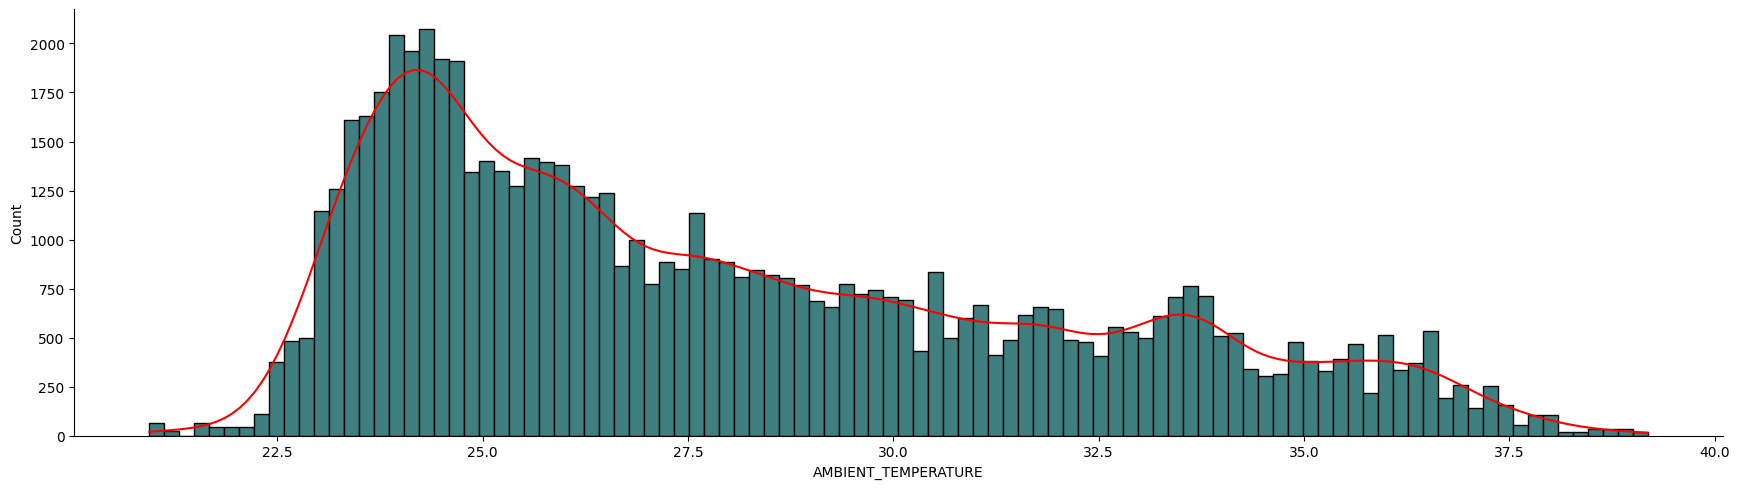

In [26]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [27]:
df_solar['DATE'].nunique()

34

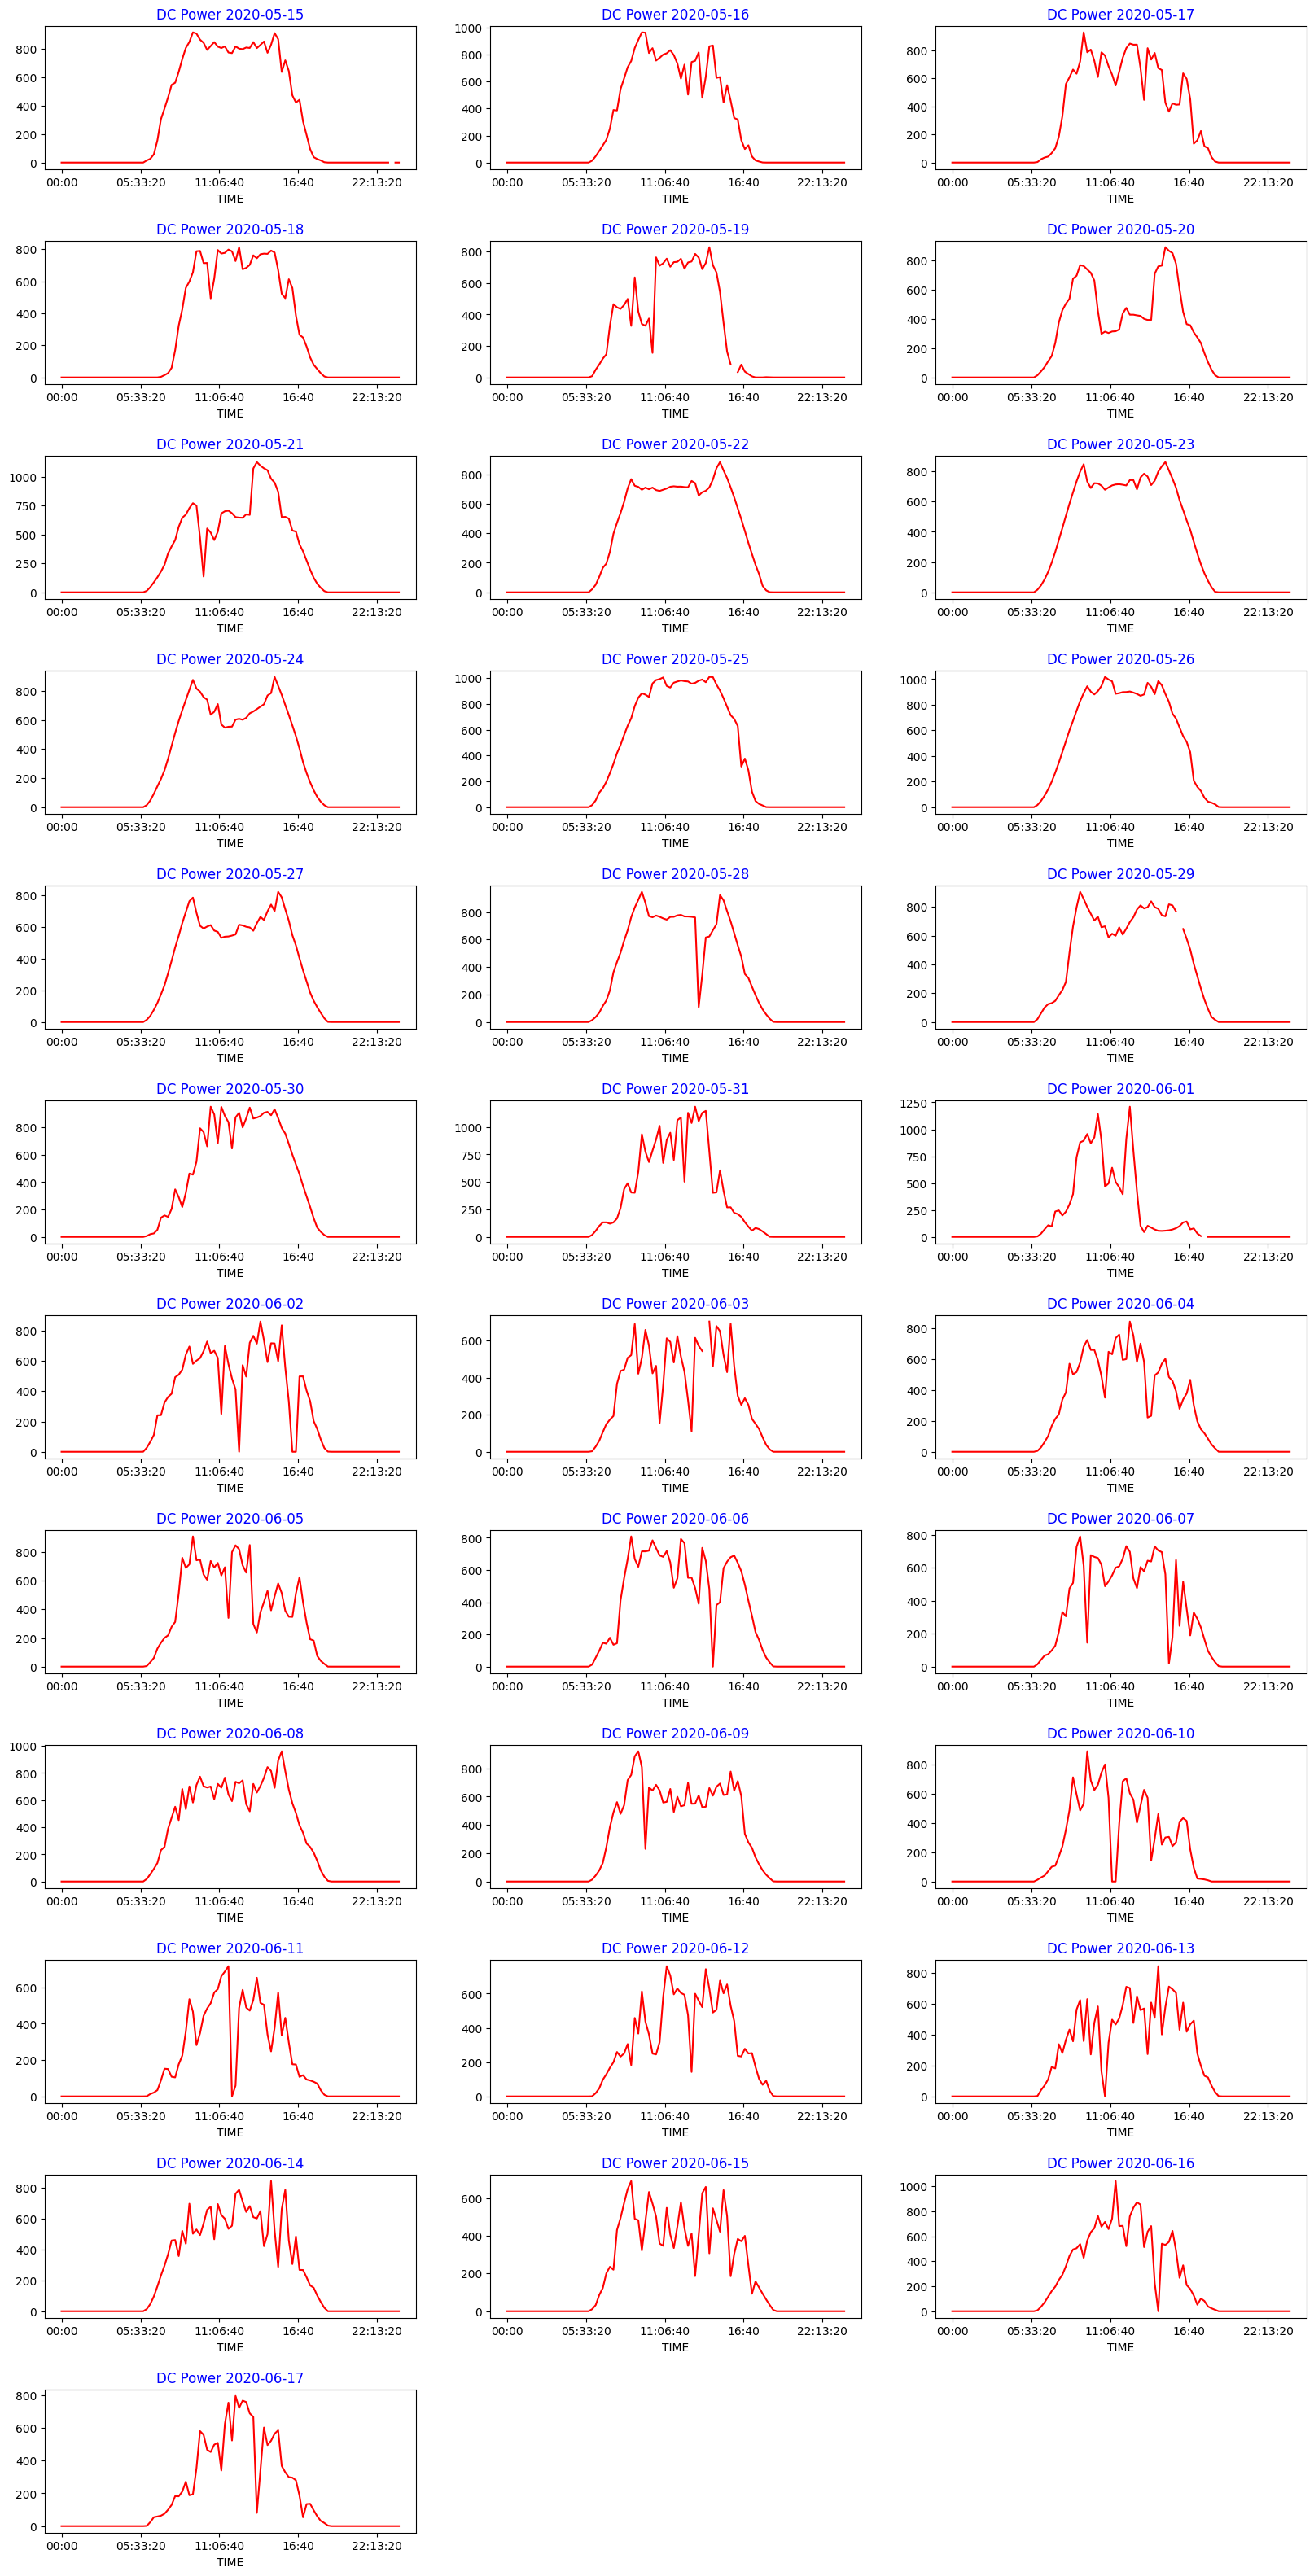

In [28]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

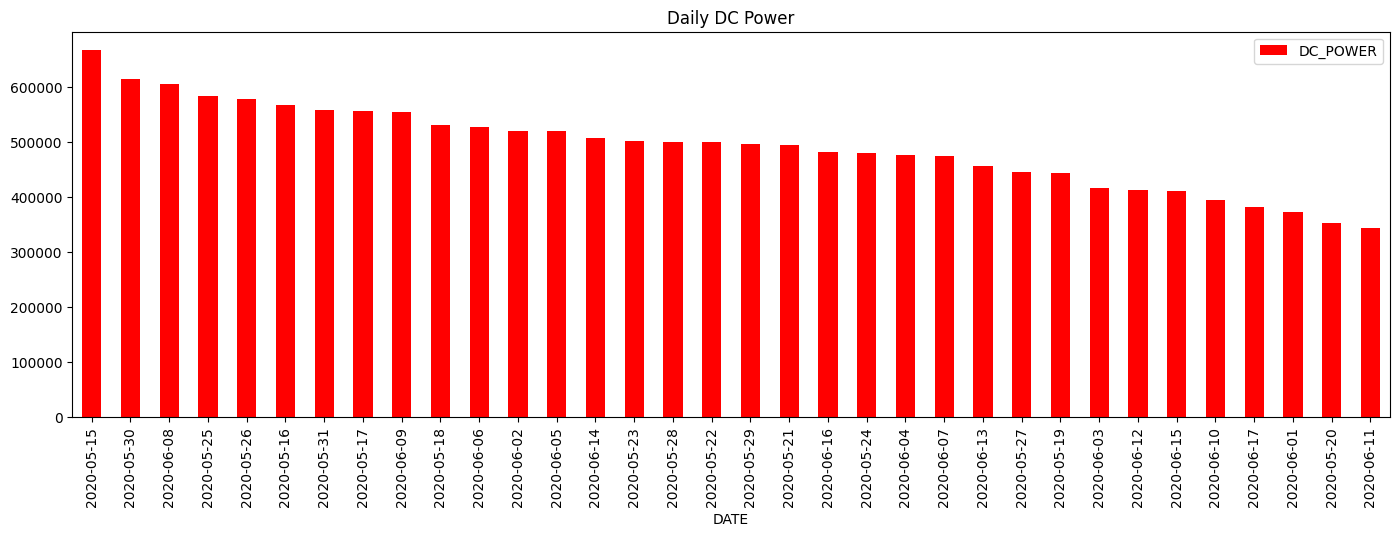

In [29]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

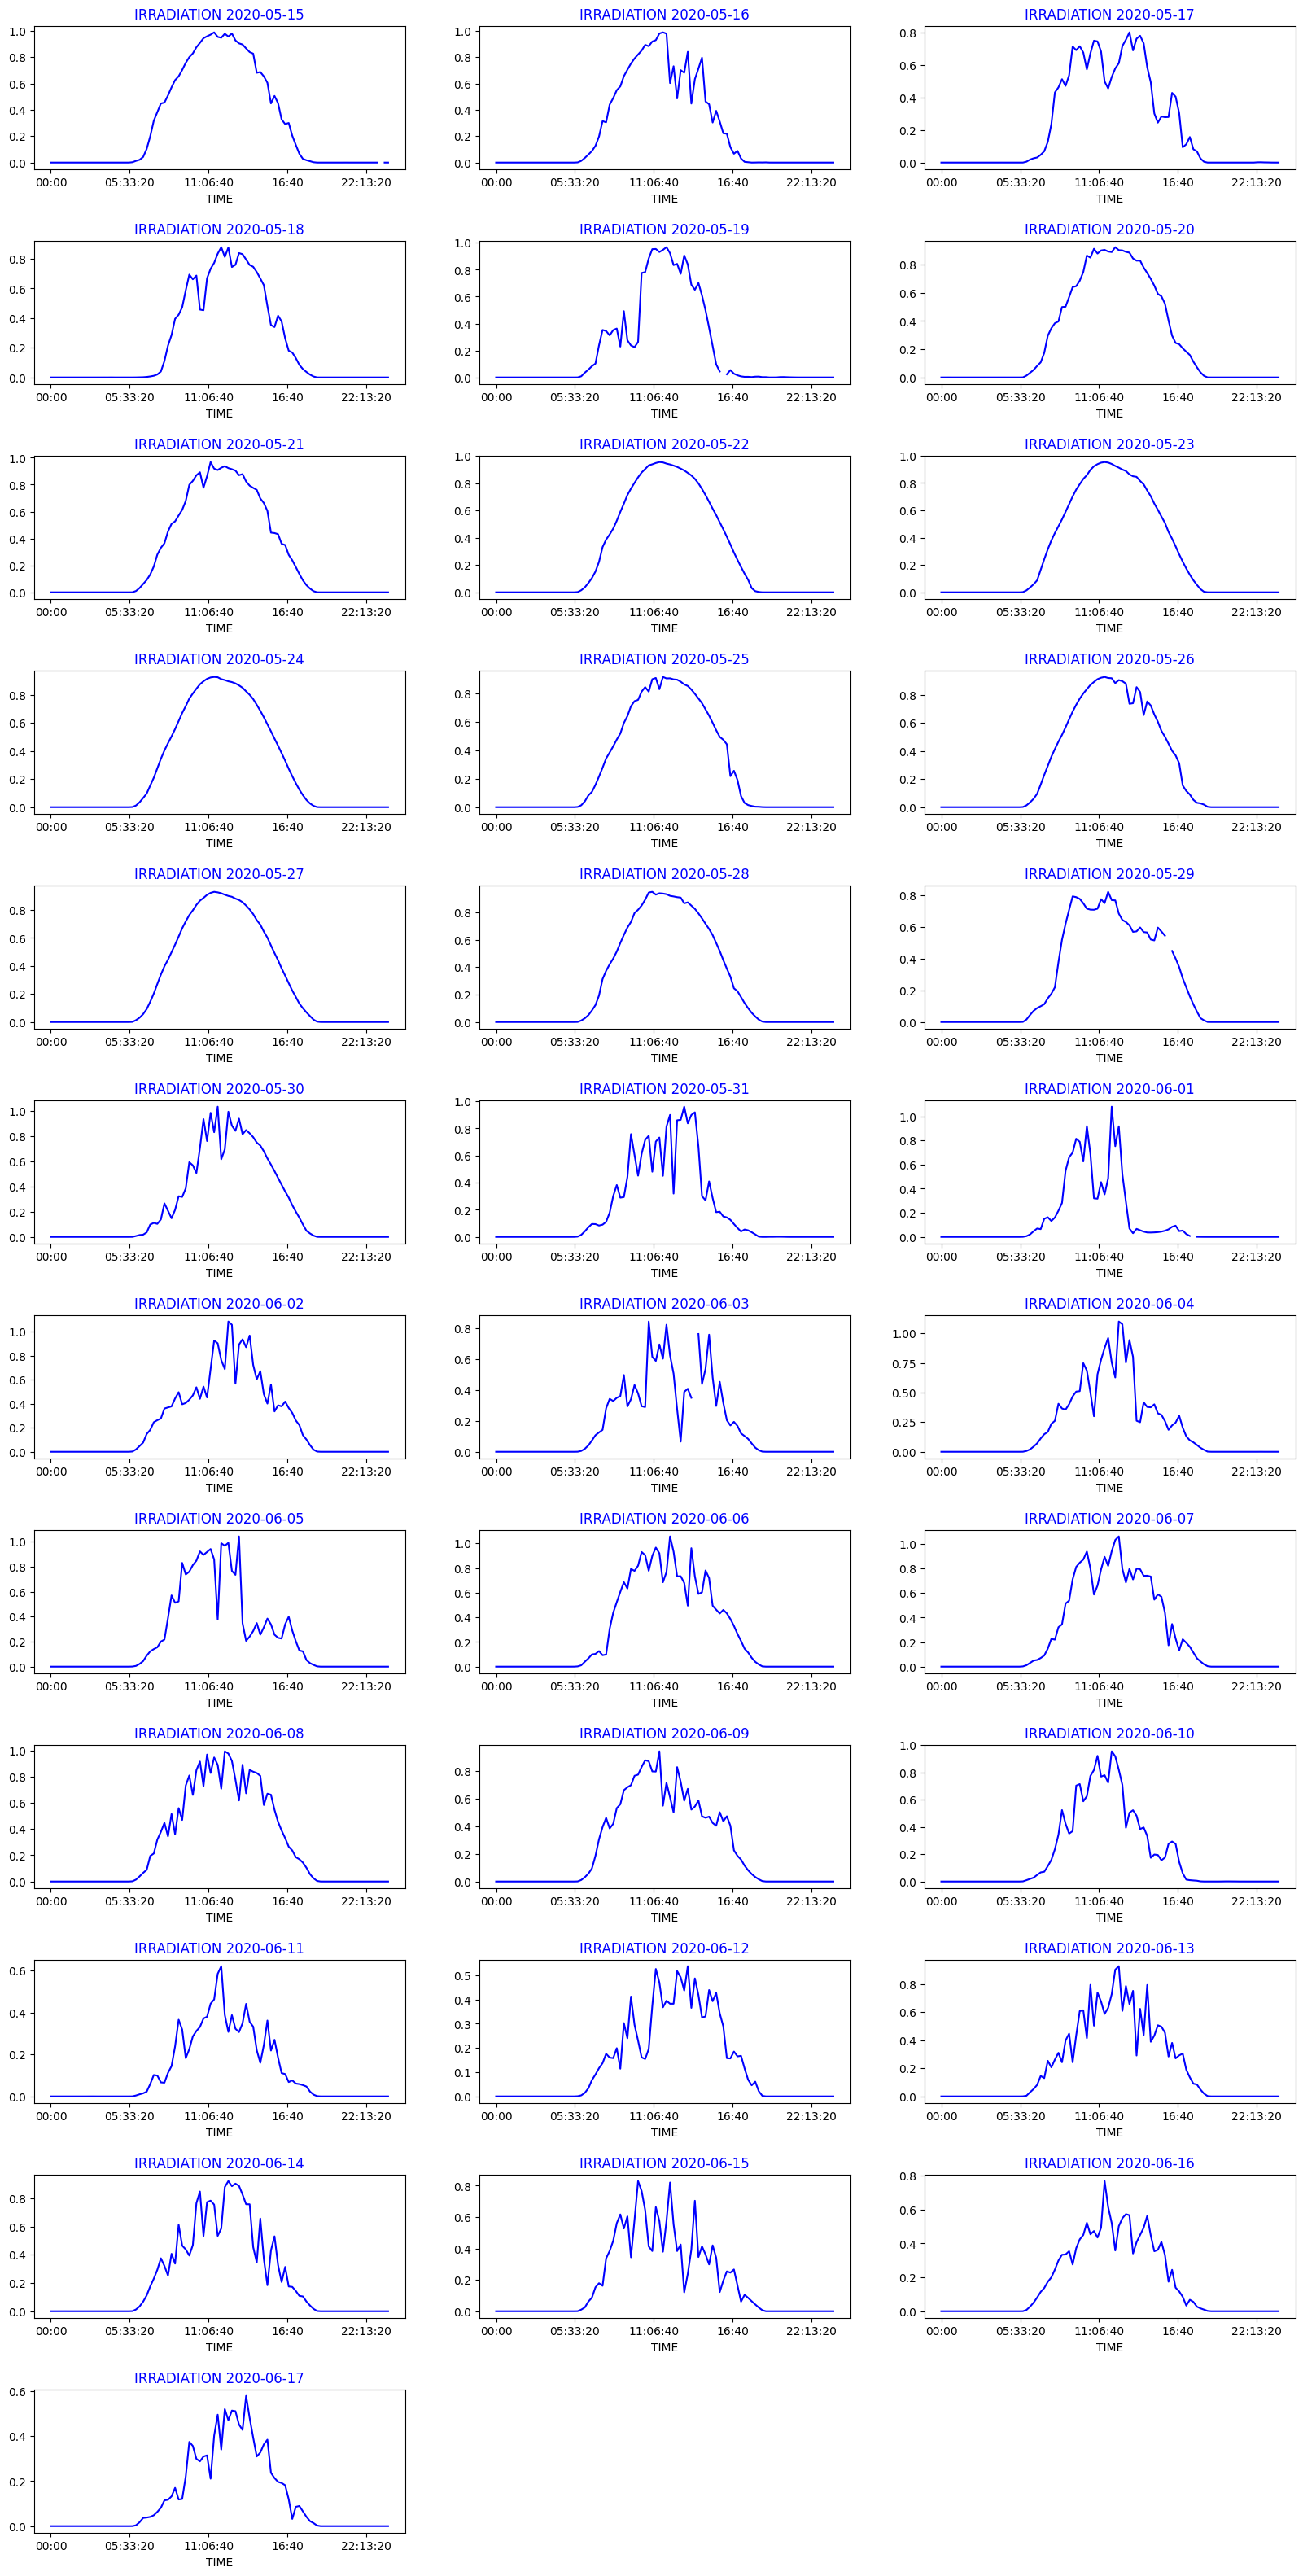

In [30]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

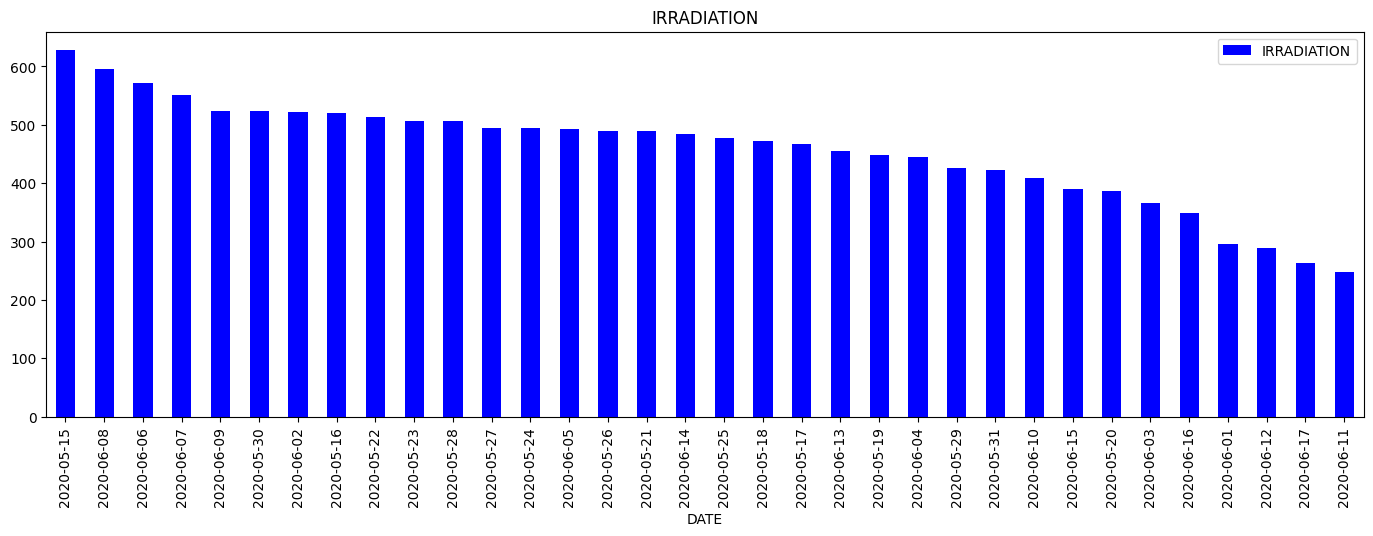

In [31]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

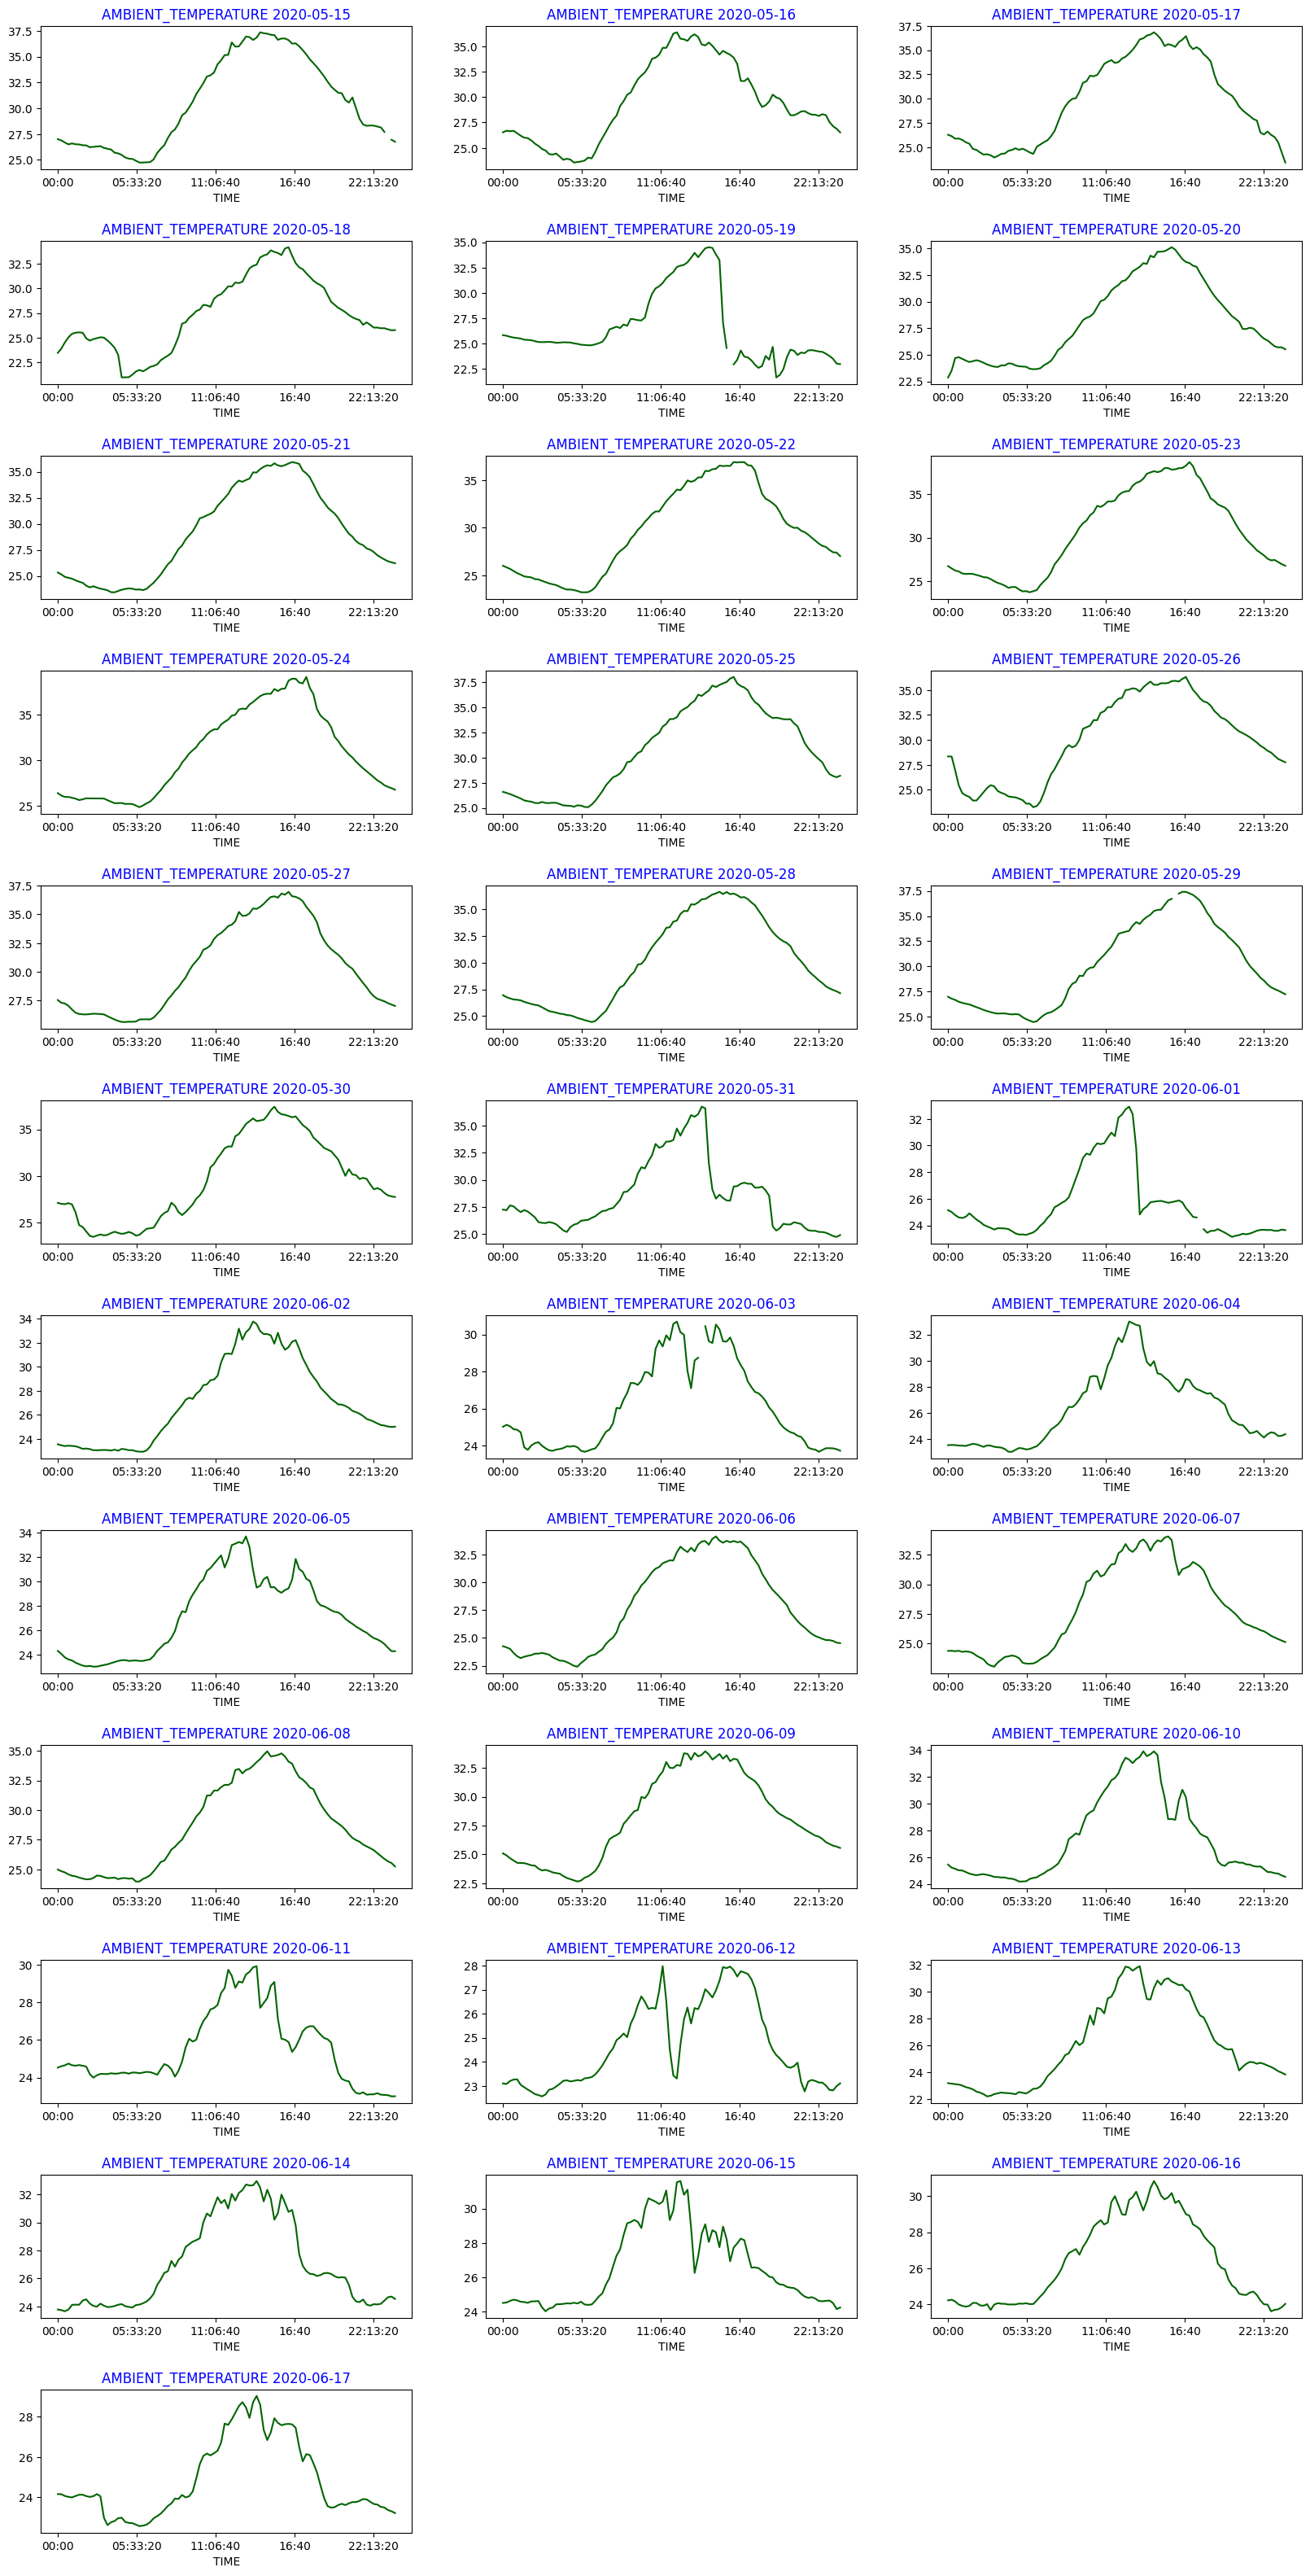

In [32]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

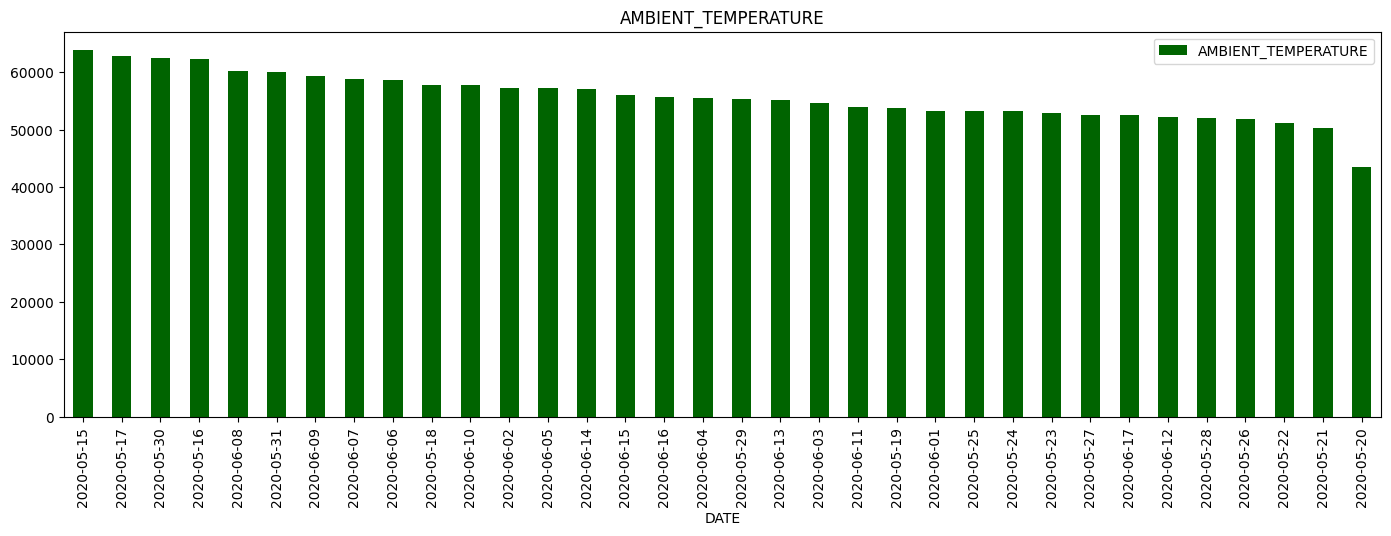

In [33]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

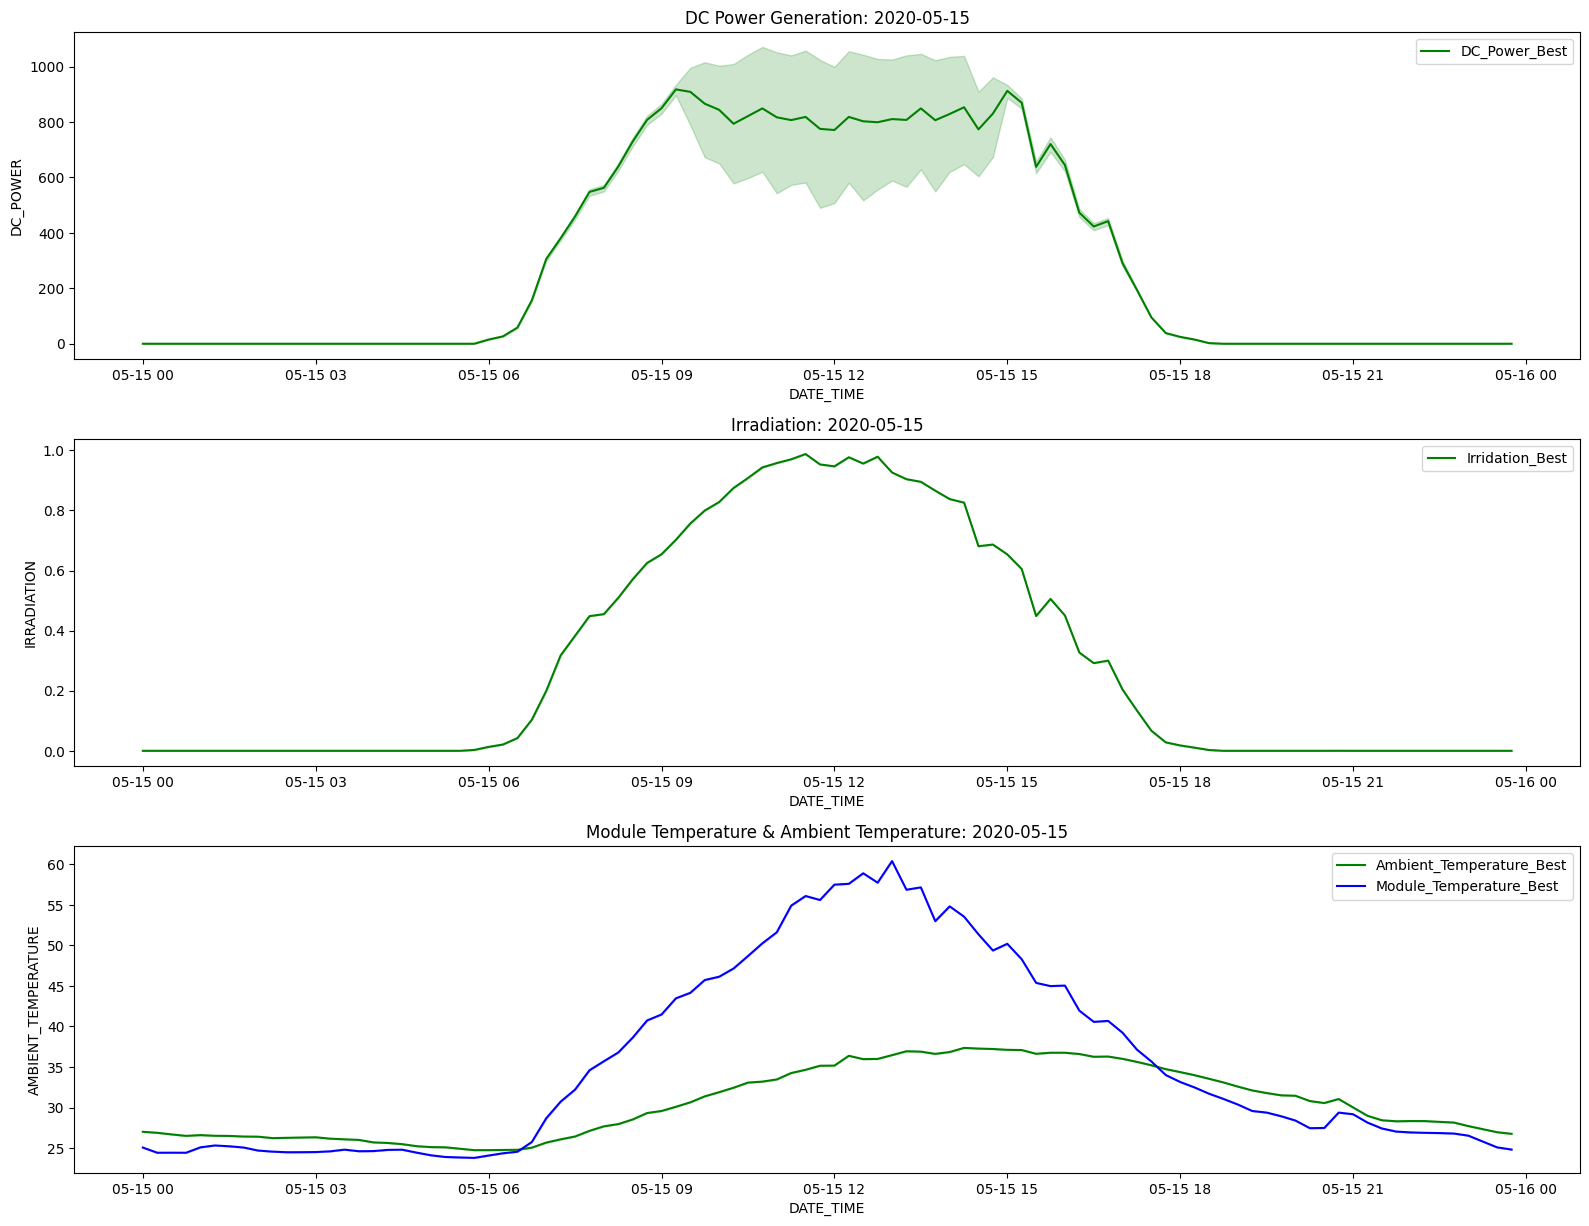

In [34]:
# Set the date as index
df_solar.set_index('DATE_TIME', inplace=True)

plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].index, y=df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].index, y=df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].index, y=df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='green')
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].index, y=df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


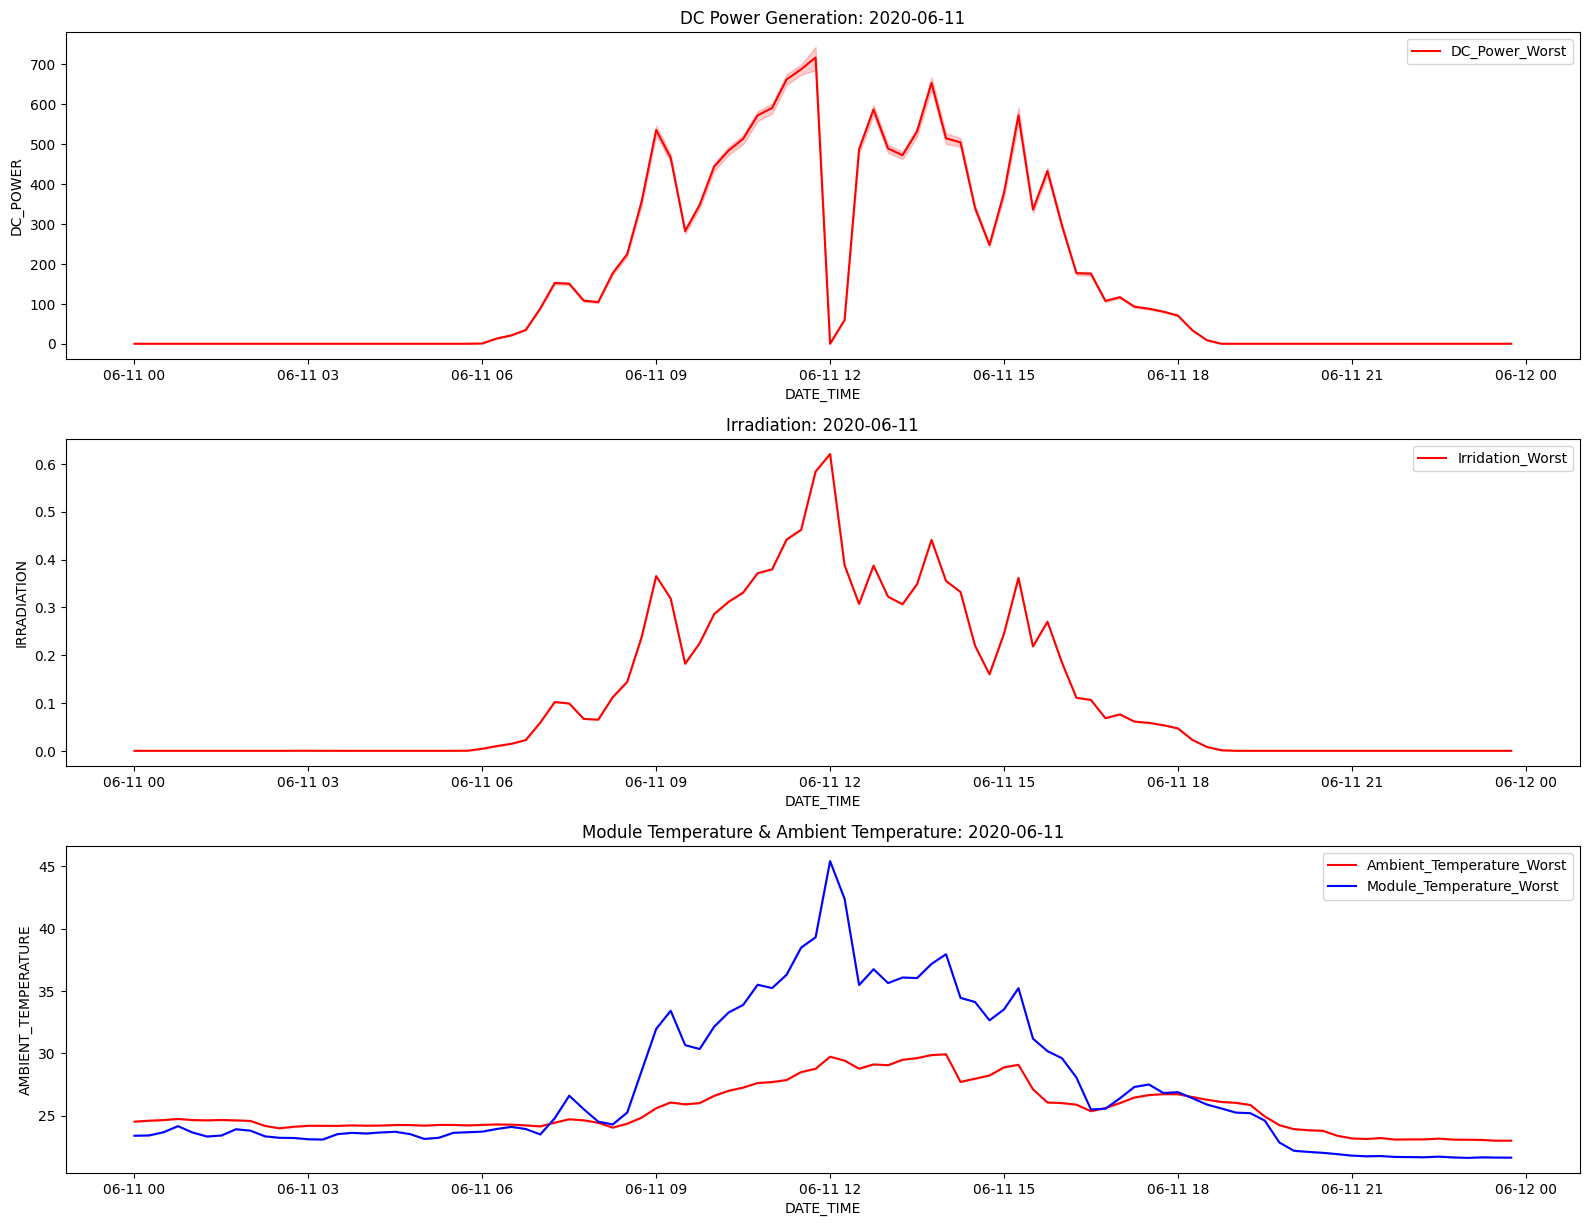

In [35]:
date = ["2020-06-11"]

plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Irridation_Worst", color='red')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


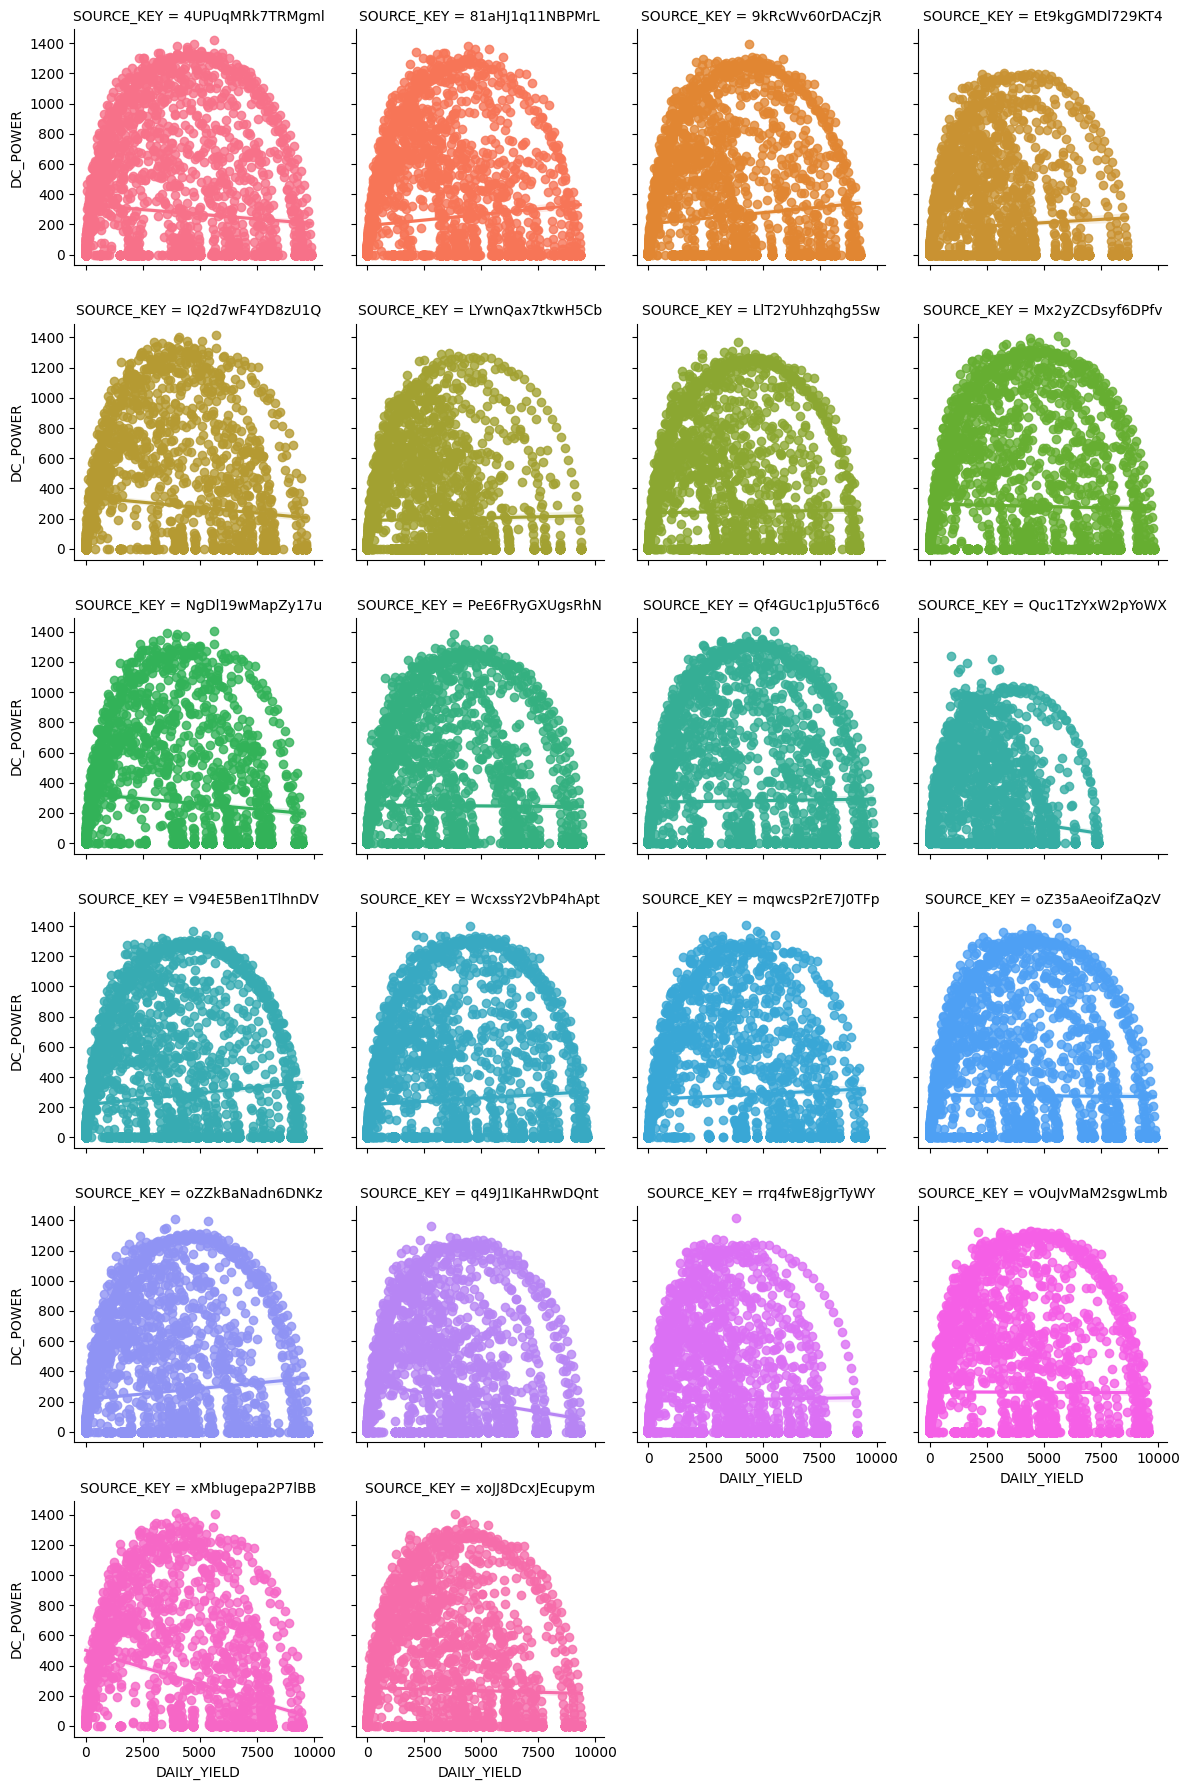

In [36]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

In [37]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [38]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [39]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
AC_list.sort()
AC_list.reverse()
len(AC_list)

32036

In [40]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

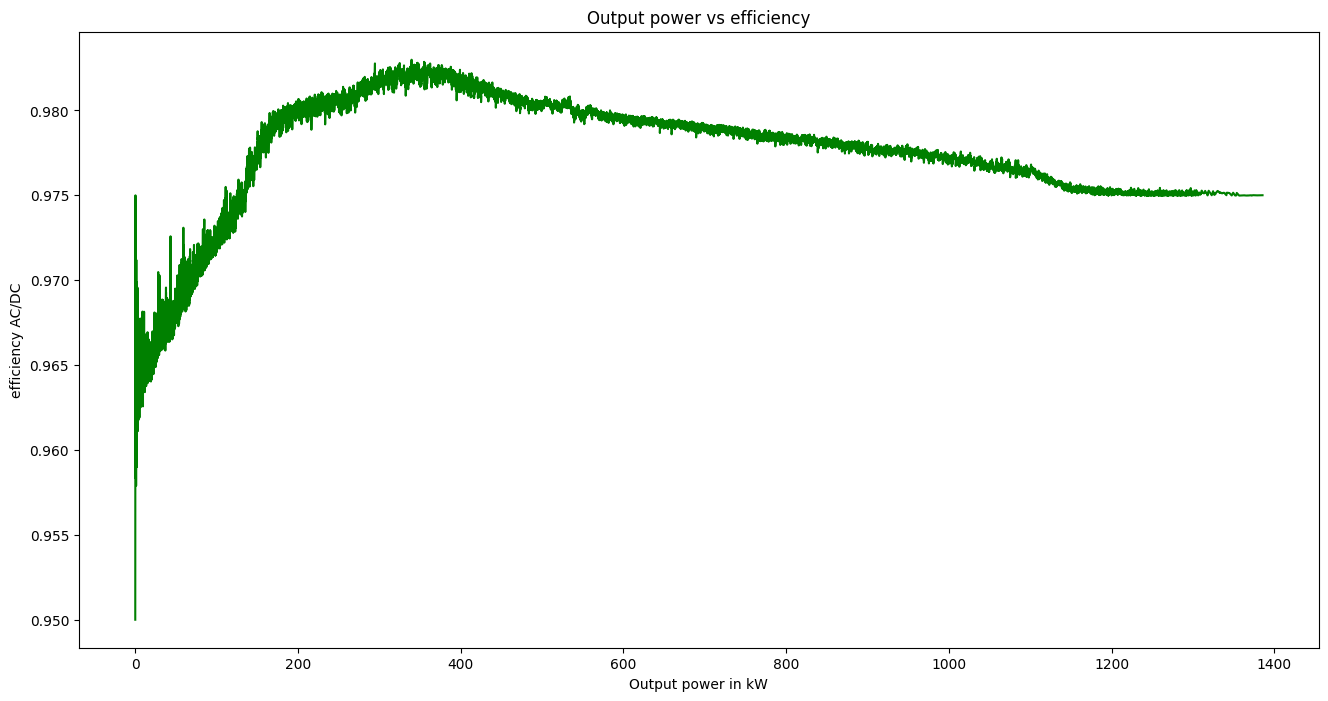

In [41]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');


In [42]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']


In [43]:
X.head()

DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  \
DATE_TIME                                                    
2020-05-15  9425.000000  2.429011e+06            27.004764   
2020-05-15     0.000000  1.215279e+09            27.004764   
2020-05-15  3075.333333  2.247720e+09            27.004764   
2020-05-15   269.933333  1.704250e+06            27.004764   
2020-05-15  3177.000000  1.994153e+07            27.004764   

            MODULE_TEMPERATURE  IRRADIATION  DC_POWER  
DATE_TIME                                              
2020-05-15           25.060789          0.0       0.0  
2020-05-15           25.060789          0.0       0.0  
2020-05-15           25.060789          0.0       0.0  
2020-05-15           25.060789          0.0       0.0  
2020-05-15           25.060789          0.0       0.0

In [44]:
y.head()

DATE_TIME
2020-05-15    0.0
2020-05-15    0.0
2020-05-15    0.0
2020-05-15    0.0
2020-05-15    0.0
Name: AC_POWER, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


R^2 Score: 1.0000


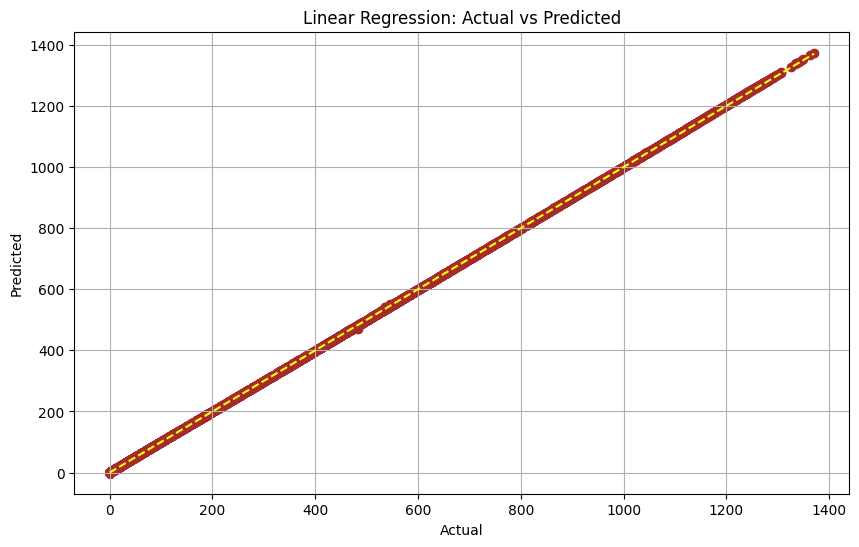

In [47]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Train the linear regression model
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

# Predict the target values
y_pred = lr_clf.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')

# Plotting the linear regression graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred,color= 'brown')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()




In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


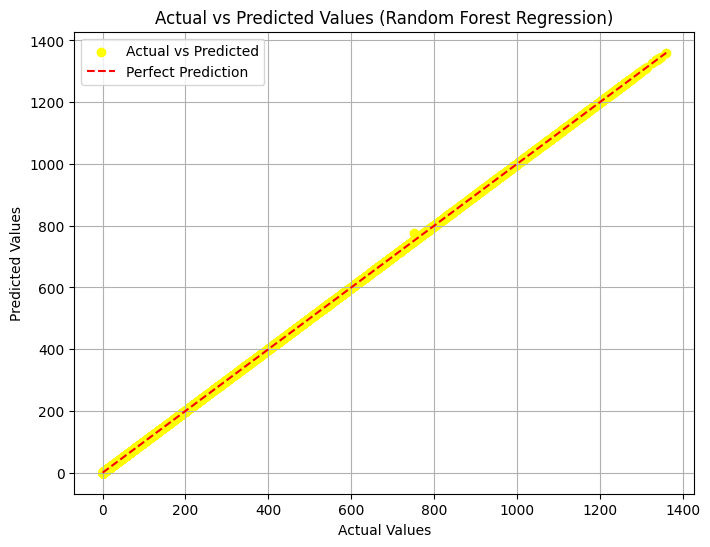

In [83]:
# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rfr, color='yellow', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()



In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


R^2 Score (Decision Tree Regression): 1.0000


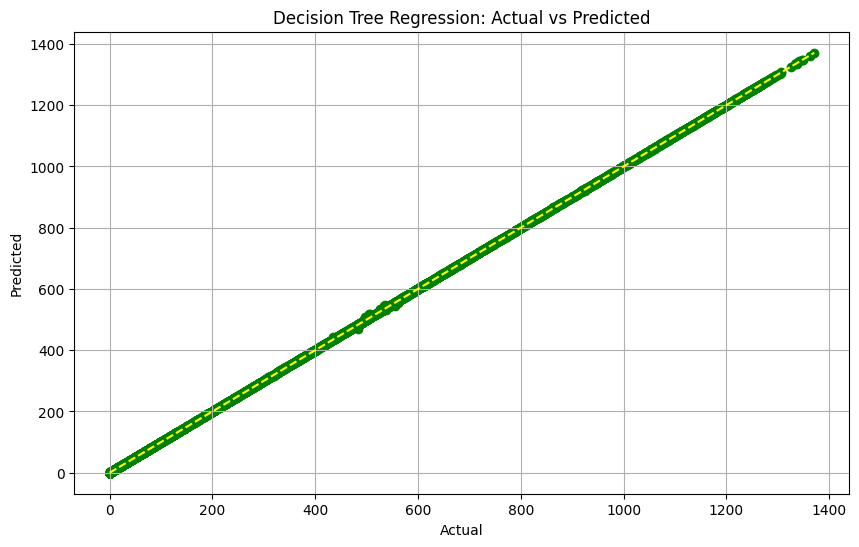

In [52]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Train the decision tree regression model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Predict the target values
y_pred_dtr = dtr.predict(X_test)

# Calculate the R^2 score
r2_dtr = r2_score(y_test, y_pred_dtr)
print(f'R^2 Score (Decision Tree Regression): {r2_dtr:.4f}')

# Plotting the decision tree regression graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, color='green')  # Set the color to green
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.grid(True)
plt.show()


In [53]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.70337619 ...    0.         1007.12493333
    0.        ]


In [54]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

Actual   Predicted
DATE_TIME                                  
2020-06-05 02:00:00    0.000000    0.000000
2020-06-10 01:45:00    0.000000    0.000000
2020-06-11 11:15:00  684.913333  684.703376
2020-05-16 03:15:00    0.000000    0.000000
2020-05-26 19:30:00    0.000000    0.000000

In [55]:
from sklearn.model_selection import train_test_split

# Splitting into training (70%) and temporary set (30%)
X_train_temp, X_test_val, y_train_temp, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, splitting the temporary set into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

# Displaying the split data counts
print("Training set count:", len(X_train_temp))
print("Validation set count:", len(X_val))
print("Testing set count:", len(X_test))


Training set count: 47388
Validation set count: 10155
Testing set count: 10155


In [56]:
from tabulate import tabulate

# Create a list of lists containing the split data counts
split_data_counts = [
    ["Training set", len(X_train_temp)],
    ["Validation set", len(X_val)],
    ["Testing set", len(X_test)]
]

# Display the tabular column
print(tabulate(split_data_counts, headers=["Data Set", "Count"]))


Data Set          Count
--------------  -------
Training set      47388
Validation set    10155
Testing set       10155


In [57]:
# Handle missing values (if any)
X_train_temp.fillna(X_train_temp.mean(), inplace=True)
X_val.fillna(X_val.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Preprocessing (scaling numerical features, encoding categorical variables, etc.)
# Apply necessary preprocessing steps here
# Display missing values in the training set
print("Missing values in the training set:")
print(X_train_temp.isnull().sum())

# Display missing values in the validation set
print("\nMissing values in the validation set:")
print(X_val.isnull().sum())

# Display missing values in the testing set
print("\nMissing values in the testing set:")
print(X_test.isnull().sum())


Missing values in the training set:
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DC_POWER               0
dtype: int64

Missing values in the validation set:
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DC_POWER               0
dtype: int64

Missing values in the testing set:
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DC_POWER               0
dtype: int64


In [58]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

import pandas as pd

# Convert NumPy array to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# Convert NumPy array to DataFrame for validation set
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)

# Convert NumPy array to DataFrame for testing set
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display preprocessed training data
print("Preprocessed Training Data:")
print(X_train_scaled_df.head())


# Display preprocessed validation data
print("\nPreprocessed Validation Data:")
print(X_val_scaled_df.head())

# Display preprocessed testing data
print("\nPreprocessed Testing Data:")
print(X_test_scaled_df.head())



Preprocessed Training Data:
   DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    -1.127217     1.556688            -1.145662           -0.912080   
1    -1.108010    -0.877187            -0.880599           -0.695185   
2    -0.600050     1.031558             0.673449            1.218438   
3    -1.127217     0.244938            -0.663356           -0.823136   
4     1.668449    -0.877195            -0.104700           -0.526117   

   IRRADIATION  DC_POWER  
0    -0.741189 -0.666682  
1    -0.411669 -0.244865  
2     1.713207  1.927997  
3    -0.741189 -0.666682  
4    -0.741189 -0.666682  

Preprocessed Validation Data:
   DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    -1.060587    -0.738919            -0.720062           -0.284928   
1     0.874074    -0.090561            -0.363380           -0.285801   
2     0.959157    -0.617776            -1.007334           -0.845811   
3     0.988311    -0.617867            -1.215166          

In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test are preprocessed and scaled data

trainer = []
tester = []

for i in range(10, 60, 10):
    X1 = X
    X2 = X ** 2
    X3 = X ** 3
    X4 = X ** 4
    X5 = X ** 5
    frames = [X1, X2, X3, X4, X5]
    X_ex = pd.concat(frames, axis=1)

    train_X, test_X, train_Y, test_Y = train_test_split(X_ex, y, test_size=0.15, random_state=41)


    model = MLPRegressor(hidden_layer_sizes=(i, i // 2, 5), max_iter=3000, learning_rate_init=0.01, activation='relu', solver='adam')
    model.fit(train_X, train_Y)

    train_p = model.predict(train_X)
    ac1 = mean_squared_error(train_Y, train_p)

    test_p = model.predict(test_X)
    ac2 = mean_squared_error(test_Y, test_p)

    trainer.append(ac1)
    tester.append(ac2)


In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

def create_model(input_shape, n_layers, n_activation, kernel_initializer):
    model = tf.keras.models.Sequential()
    for i, nodes in enumerate(n_layers):
        if i == 0:
            model.add(Dense(nodes, kernel_initializer=kernel_initializer, activation=n_activation, input_dim=input_shape))
            # You can optionally add dropout layers here if needed
        else:
            model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernel_initializer))
            # You can optionally add dropout layers here if needed

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model

# Example usage:
# Replace these values with your own
input_shape = X_train.shape[1]  # Shape of your input features
n_layers = [64, 32]  # Number of nodes in each hidden layer
n_activation = 'relu'  # Activation function
kernel_initializer = 'glorot_uniform'  # Kernel initializer

# Create the model
model = create_model(input_shape, n_layers, n_activation, kernel_initializer)


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_spfnet(n_layers, n_activation, kernels):
    model = Sequential()
    for i, nodes in enumerate(n_layers):
        if i == 0:
            model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train_scaled.shape[1]))
        else:
            model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
    model.add(Dense(1))
    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Assuming X_train_scaled is your preprocessed training data
spfnet = create_spfnet([32, 64], 'relu', 'normal')
spfnet.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Assuming X_train_scaled is your preprocessed training data
input_dim = X_train_scaled.shape[1]

model = Sequential()

model.add(Dense(8, kernel_initializer='normal', activation='relu', input_dim=input_dim))

model.add(Dense(16, activation='relu', kernel_initializer='normal'))

model.add(Dense(32, activation='relu', kernel_initializer='normal'))

model.add(Dense(64, activation='relu', kernel_initializer='normal'))

model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [63]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,921 (11.41 KB)

 Trainable params: 2,921 (11.41 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
from sklearn.metrics import accuracy_score as acc

In [65]:
from sklearn.model_selection import train_test_split

# Splitting into training (70%) and temporary set (30%)
X_train_temp, X_test_val, y_train_temp, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, splitting the temporary set into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

def train_and_evaluate_classifier(train_X, train_Y, test_X, test_Y):
    try:
        # Define the number of bins or intervals
        n_bins = 5

        # Initialize the discretizer
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

        # Discretize the target variable
        train_Y_discretized = discretizer.fit_transform(train_Y.values.reshape(-1, 1))
        test_Y_discretized = discretizer.transform(test_Y.values.reshape(-1, 1))

        # Initialize and train the classifier
        classifier = RandomForestClassifier()
        classifier.fit(train_X, train_Y_discretized)

        # Make predictions
        train_pred = classifier.predict(train_X)
        test_pred = classifier.predict(test_X)

        # Evaluate the classifier
        train_accuracy = accuracy_score(train_Y_discretized, train_pred)
        test_accuracy = accuracy_score(test_Y_discretized, test_pred)

        return train_accuracy, test_accuracy

    except Exception as e:
        print("An error occurred:", e)
        return None, None

# Usage example
train_accuracy, test_accuracy = train_and_evaluate_classifier(train_X, train_Y, test_X, test_Y)
if train_accuracy is not None and test_accuracy is not None:
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)


An error occurred: Input X contains infinity or a value too large for dtype('float32').


In [67]:
np.isfinite(train_X).all()


DAILY_YIELD            True
TOTAL_YIELD            True
AMBIENT_TEMPERATURE    True
MODULE_TEMPERATURE     True
IRRADIATION            True
DC_POWER               True
DAILY_YIELD            True
TOTAL_YIELD            True
AMBIENT_TEMPERATURE    True
MODULE_TEMPERATURE     True
IRRADIATION            True
DC_POWER               True
DAILY_YIELD            True
TOTAL_YIELD            True
AMBIENT_TEMPERATURE    True
MODULE_TEMPERATURE     True
IRRADIATION            True
DC_POWER               True
DAILY_YIELD            True
TOTAL_YIELD            True
AMBIENT_TEMPERATURE    True
MODULE_TEMPERATURE     True
IRRADIATION            True
DC_POWER               True
DAILY_YIELD            True
TOTAL_YIELD            True
AMBIENT_TEMPERATURE    True
MODULE_TEMPERATURE     True
IRRADIATION            True
DC_POWER               True
dtype: bool

In [68]:
# Remove duplicate columns
df_solar = df_solar.loc[:, ~df_solar.columns.duplicated()]



In [69]:

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)


In [70]:
import numpy as np

# Check for NaN values
nan_indices = np.isnan(X)

# Check for infinite values
inf_indices = np.isinf(X)


In [71]:
print(df_solar.dtypes)


SOURCE_KEY              object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
DATE                    object
TIME                    object
DAY                      int32
MONTH                    int32
WEEK                    UInt32
HOURS                    int32
MINUTES                  int32
TOTAL MINUTES PASS       int32
DATE_STRING             object
SOURCE_KEY_NUMBER        int64
dtype: object


In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features using Min-Max scaling
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Define the number of bins for discretization
n_bins = 5

# Initialize the discretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Discretize the target variables
train_Y_discretized = discretizer.fit_transform(train_Y.values.reshape(-1, 1)).flatten()
test_Y_discretized = discretizer.transform(test_Y.values.reshape(-1, 1)).flatten()

# Initialize and train the classifier
classifier = RandomForestClassifier()
classifier.fit(train_X_scaled, train_Y_discretized)

# Make predictions
train_pred = classifier.predict(train_X_scaled)
test_pred = classifier.predict(test_X_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(train_Y_discretized, train_pred)
test_accuracy = accuracy_score(test_Y_discretized, test_pred)

print("Train Accuracy:", train_accuracy * 100, "%")
print("Test Accuracy:", test_accuracy * 100, "%")


Train Accuracy: 100.0 %
Test Accuracy: 99.9507631708518 %


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features using Min-Max scaling
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Define the number of bins for discretization
n_bins = 5

# Initialize the discretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Discretize the target variable
train_Y_discretized = discretizer.fit_transform(train_Y.values.reshape(-1, 1))
test_Y_discretized = discretizer.transform(test_Y.values.reshape(-1, 1))

# Initialize and train the classifier
classifier = RandomForestClassifier()
classifier.fit(train_X_scaled, train_Y_discretized)

# Make predictions
train_pred = classifier.predict(train_X_scaled)
test_pred = classifier.predict(test_X_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(train_Y_discretized, train_pred)
test_accuracy = accuracy_score(test_Y_discretized, test_pred)

print("Train Accuracy:", train_accuracy * 100, "%")
print("Test Accuracy:", test_accuracy * 100, "%")





In [74]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define the number of folds for cross-validation
num_folds = 5

# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True)

# Initialize RandomForestClassifier
classifier = RandomForestClassifier()

train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(train_X):
    # Convert indices to arrays
    train_index = np.array(train_index)
    test_index = np.array(test_index)

    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = train_X.iloc[train_index], train_X.iloc[test_index]
    Y_train_fold, Y_test_fold = train_Y.iloc[train_index], train_Y.iloc[test_index]

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the features using Min-Max scaling
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)

    # Define the number of bins for discretization
    n_bins = 5

    # Initialize the discretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

    # Discretize the target variable
    Y_train_discretized = discretizer.fit_transform(Y_train_fold.values.reshape(-1, 1))
    Y_test_discretized = discretizer.transform(Y_test_fold.values.reshape(-1, 1))

    # Train the classifier
    classifier.fit(X_train_scaled, Y_train_discretized.ravel())

    # Make predictions on train and test sets
    train_pred = classifier.predict(X_train_scaled)
    test_pred = classifier.predict(X_test_scaled)

    # Calculate accuracy for train and test sets
    train_accuracy = accuracy_score(Y_train_discretized, train_pred)
    test_accuracy = accuracy_score(Y_test_discretized, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print("Average Train Accuracy:", avg_train_accuracy * 100, "%")
print("Average Test Accuracy:", avg_test_accuracy * 100, "%")




Average Train Accuracy: 100.0 %
Average Test Accuracy: 99.94265131038131 %


In [ ]:
import pickle

# Save the trained model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Train the linear regression model
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

# Save the trained model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_clf, file)

# Predict the target values
y_pred = lr_clf.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')

# Plotting the linear regression graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred,color= 'yellow')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Assuming input_dim is the number of features in your dataset
input_dim = X_train_scaled.shape[1]

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(1)  # No activation function for regression problem
])

# Plot the model
plot_model(model, to_file='your_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
from sklearn.neural_network import MLPRegressor

# Define and initialize your MLPRegressor model
spfnet = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                      max_iter=150, random_state=42)

# Train the model using the fit method
hist = spfnet.fit(X_train, y_train)


In [ ]:
import matplotlib.pyplot as plt

# Access the loss values from the training history
train_loss = hist.loss_curve_

# Plot the training loss over epochs
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()


In [ ]:
# Make predictions on the training data
train_pred = spfnet.predict(X_train)

# Calculate the root mean squared error (RMSE)
rmse_train = mean_squared_error(train_pred, y_train, squared=False)

print("Root Mean Squared Error (RMSE) on Training Data:", rmse_train)


In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming you have already trained your MLPRegressor model 'spfnet' and prepared your data

# Predict on training data
train_pred = spfnet.predict(X_train)

# Calculate mean squared error (MSE) for training data
train_rmse = mean_squared_error(y_train, train_pred, squared=False)

# Predict on testing data
test_pred = spfnet.predict(X_test)

# Calculate mean squared error (MSE) for testing data
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming you have already trained your MLPRegressor model 'spfnet' and prepared your data

# Fit MinMaxScaler on y_train
scaler_y = MinMaxScaler().fit(y_train.values.reshape(-1, 1))

# Predict on testing data
y_pred = spfnet.predict(X_test)

# Inverse transform predictions
y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Inverse transform true test outcomes
y_test_orig = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

# Calculate RMSE for the original unscaled values
RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
print("RMSE (Original):", RMSE_orig)

In [ ]:
from sklearn.metrics import mean_squared_error

# Fit MinMaxScaler on y_train
scaler_y = MinMaxScaler().fit(y_train.values.reshape(-1, 1))

# Predict on training data
train_pred = spfnet.predict(X_train)

# Inverse transform predictions
train_pred_orig = scaler_y.inverse_transform(train_pred.reshape(-1, 1))

# Inverse transform true train outcomes
y_train_orig = scaler_y.inverse_transform(y_train.values.reshape(-1, 1))

# Calculate RMSE for the original unscaled values
RMSE_train_orig = mean_squared_error(train_pred_orig, y_train_orig, squared=False)
print("RMSE (Original) for Training Data:", RMSE_train_orig)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
import numpy as np

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features using Min-Max scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of bins for discretization
n_bins = 5

# Initialize the discretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Discretize the target variable
Y_train_discretized = discretizer.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_discretized = discretizer.transform(Y_test.values.reshape(-1, 1))

# Define your neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(n_bins, activation='softmax')  # Output layer with number of bins as classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for integer targets
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, Y_train_discretized, epochs=10, validation_data=(X_test_scaled, Y_test_discretized))

# Visualize training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Visualize training and validation losses over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Concatenate predicted and true values horizontally
concatenated_values = np.concatenate((train_pred_orig, y_train_orig), axis=1)


In [ ]:
import numpy as np

# Concatenate predicted and true values horizontally
concatenated_values = np.concatenate((y_pred_orig, y_test_orig), axis=1)


In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

In [ ]:
import matplotlib.pyplot as plt

# Plot for training data
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Solar Power on Training Data')
plt.ylabel('Real Solar Power on Training Data')
plt.title('Training Predictions vs Real Data')

# Plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Solar Power on Test Data')
plt.ylabel('Real Solar Power on Test Data')
plt.title('Test Predictions vs Real Data')

plt.show()


In [ ]:
cross_checking_final = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'LightGreen',  # Corrected typo here
        'font-size': '15px'
    })


In [ ]:

import matplotlib.pyplot as plt

# Collect input from the user
ac_power = float(input("Enter AC power (in kW): "))
efficiency = float(input("Enter efficiency of the solar panel (0-1): "))

# Calculate DC power using the input values
dc_power = ac_power / efficiency

print(dc_power)

In [ ]:
import pickle
import numpy as np

# Load the trained model
with open('linear_regression_model.pkl', 'rb') as file:
    lr_clf = pickle.load(file)

# Sample input data (replace with user-defined data)
ac_power = float(input("Enter AC power (in kW): "))
temperature = float(input("Enter temperature (in Celsius): "))
irradiance = float(input("Enter irradiance (in W/m^2): "))
day_of_year = int(input("Enter day of year: "))

# Assuming you want to predict for the entire day, you can set the time_of_day to a representative value
time_of_day = 12  # Assuming midday (12 PM)

# Placeholder value for the missing feature
placeholder_feature = 0  # You can replace this with an appropriate default value

# Creating an input array with the user-defined values
input_data = np.array([[ac_power, temperature, irradiance, time_of_day, day_of_year, placeholder_feature]])

# Predict the DC power output
predicted_dc_power = lr_clf.predict(input_data)

print("Predicted DC Power (Solar Power) for the entire day:", predicted_dc_power[0])

In [ ]:
 pip install colorama

In [ ]:
import pandas as pd

# Assuming df_solar is your DataFrame containing the solar energy data

# Group by date and sum the DC_POWER or AC_POWER for each day
daily_energy_usage = df_solar.groupby('DATE')['DC_POWER'].sum()  # You can replace 'DC_POWER' with 'AC_POWER' if needed

# Find the day of least energy usage
day_least_usage = daily_energy_usage.idxmin()  # Index of the minimum value
least_usage = daily_energy_usage.min()  # Minimum value

# Find the day of highest energy usage
day_highest_usage = daily_energy_usage.idxmax()  # Index of the maximum value
highest_usage = daily_energy_usage.max()  # Maximum value

# Print the results
print("Day of least energy usage:", day_least_usage, "with energy usage:", least_usage)
print("Day of highest energy usage:", day_highest_usage, "with energy usage:", highest_usage)

# Now you can send an alert page according to the energy usage


In [ ]:
from colorama import Fore, Back, Style

# Define the slab rates
slabs = [
    (0, 100, 4.50),
    (101, 200, 2.25),
    (201, 400, 4.50),
    (401, 500, 6.00),
    (501, 600, 8.00),
    (601, 800, 9.00),
    (801, 1000, 10.00),
    (1001, float('inf'), 11.00)
]

# Sample input data for AC power units consumed
ac_power_consumed = float(input("Enter AC power units consumed in kwh: "))

# Initialize total consumed units and total electricity cost
total_consumed_units = 0
total_electricity_cost = 0

# Print bill header
print(Back.BLUE + Fore.WHITE + "Electricity Bill" + Style.RESET_ALL)

# Print header for tabulated data
print(Back.CYAN + Fore.BLACK + " Slab Range        |  Rate (Rs/Unit)  |  Units Consumed  |  Cost (Rs)  " + Style.RESET_ALL)

# Calculate consumed units and total electricity cost within each slab range
for slab in slabs:
    slab_start, slab_end, slab_cost = slab
    if ac_power_consumed <= 0:
        break
    if ac_power_consumed <= (slab_end - slab_start):
        total_consumed_units += ac_power_consumed
        total_electricity_cost += ac_power_consumed * slab_cost
        # Print the data for the current slab
        print(Back.WHITE + Fore.BLACK + f" {slab_start}-{slab_end:<5}             |       {slab_cost:<15.2f}  |       {ac_power_consumed:<15} |    {ac_power_consumed * slab_cost:<10.2f} " + Style.RESET_ALL)
        break
    else:
        total_consumed_units += (slab_end - slab_start)
        total_electricity_cost += (slab_end - slab_start) * slab_cost
        ac_power_consumed -= (slab_end - slab_start)
        # Print the data for the current slab
        print(Back.WHITE + Fore.BLACK + f" {slab_start}-{slab_end:<5}             |       {slab_cost:<15.2f}  |       {(slab_end - slab_start):<15} |    {(slab_end - slab_start) * slab_cost:<10.2f} " + Style.RESET_ALL)

# Print the total consumed units and total electricity cost
print(Fore.GREEN + f"Total consumed units: {total_consumed_units}" + Style.RESET_ALL)
print(Fore.GREEN + f"Total electricity cost: {total_electricity_cost} rupees" + Style.RESET_ALL)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import pickle
import numpy as np

# Load the trained model
with open('linear_regression_model.pkl', 'rb') as file:
    lr_clf = pickle.load(file)

# Placeholder value for the missing feature
placeholder_feature = 0  # You can replace this with an appropriate default value

# Define function to calculate solar power
def calculate_solar_power(total_ac_power_month, temperature, irradiance):
    # Assuming prediction for each day of the month
    days_in_month = 30  # Assuming a month with 30 days, you can adjust this
    time_of_day = 12  # Assuming midday (12 PM)

    # Initialize array to store predicted DC power for each day
    predicted_dc_power_month = np.zeros(days_in_month)

    # Calculate average daily AC power consumption
    average_ac_power_per_day = total_ac_power_month / days_in_month
    # Initialize cumulative DC power
    cumulative_dc_power = 0.0

    # Loop through each day of the month
    for day in range(1, days_in_month + 1):
        # Creating input array with user-defined values for each day
        input_data = np.array([[average_ac_power_per_day, temperature, irradiance, time_of_day, day, placeholder_feature]])

        # Predict the DC power output for the current day
        predicted_dc_power = lr_clf.predict(input_data)

        # Store the predicted DC power for the current day
        predicted_dc_power_month[day - 1] = predicted_dc_power
        # Update cumulative DC power
        cumulative_dc_power += predicted_dc_power

    # Calculate absolute AC power saved (|AC power - DC power|) for each day
    absolute_ac_power_saved_per_day = np.abs(average_ac_power_per_day - predicted_dc_power_month)

    # Calculate total absolute AC power saved for the month
    total_absolute_ac_power_saved = np.sum(absolute_ac_power_saved_per_day)

    # Clear previous output
    clear_output()

    # Print results with colors
    print("\033[102m\033[30m\033[1mPredicted DC Power for Each Day of the Month:\033[0m")
    for day, power in enumerate(predicted_dc_power_month, start=1):
        print(f"\033[102m\033[30m\033[1mDay {day}: Predicted DC Power (Solar Power) = {power} kW\033[0m")
    print(f"\033[104m\033[30m\033[1m\nAverage Predicted DC Power for the Month: {np.mean(predicted_dc_power_month)} kW\033[0m")
    print(f"\033[104m\033[30m\033[1m\nCumulative Predicted DC Power for the Month: {cumulative_dc_power} kW\033[0m")

    print("\033[102m\033[30m\033[1m\nAC Power Saved for Each Day of the Month:\033[0m")
    for day, power_saved in enumerate(absolute_ac_power_saved_per_day, start=1):
        print(f"\033[102m\033[30m\033[1mDay {day}: AC Power Saved = {power_saved} kWh\033[0m")
    print(f"\033[104m\033[30m\033[1m\nTotal AC Power Saved for the Month: {total_absolute_ac_power_saved} kWh\033[0m")

# Create input widgets
total_ac_power_input = widgets.FloatText(description='Total AC Power (kWh):', style={'description_width': 'initial'})
temperature_input = widgets.FloatText(description='Average Temperature (°C):', style={'description_width': 'initial'})
irradiance_input = widgets.FloatText(description='Average Irradiance (W/m^2):', style={'description_width': 'initial'})
calculate_button = widgets.Button(description='Calculate', style={'description_width': 'initial', 'button_color': 'white', 'font_weight': 'bold', 'font_size': '16px'})

# Define function to handle button click event
def on_button_click(b):
    total_ac_power_month = total_ac_power_input.value
    temperature = temperature_input.value
    irradiance = irradiance_input.value
    calculate_solar_power(total_ac_power_month, temperature, irradiance)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display widgets
display(total_ac_power_input)
display(temperature_input)
display(irradiance_input)
display(calculate_button)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import pickle
import numpy as np

# Load the trained model
with open('linear_regression_model.pkl', 'rb') as file:
    lr_clf = pickle.load(file)

# Placeholder value for the missing feature
placeholder_feature = 0  # You can replace this with an appropriate default value

# Define function to calculate solar power for multiple months
def calculate_solar_power_for_multiple_months(months_data):
    cumulative_dc_power_total = 0.0
    total_absolute_ac_power_saved_total = 0.0

    for month_index, month_data in enumerate(months_data, start=1):
        total_ac_power_month, temperature, irradiance = month_data
        # Assuming prediction for each day of the month
        days_in_month = 30  # Assuming a month with 30 days, you can adjust this
        time_of_day = 12  # Assuming midday (12 PM)

        # Initialize array to store predicted DC power for each day
        predicted_dc_power_month = np.zeros(days_in_month)

        # Calculate average daily AC power consumption
        average_ac_power_per_day = total_ac_power_month / days_in_month
        # Initialize cumulative DC power
        cumulative_dc_power = 0.0

        # Loop through each day of the month
        for day in range(1, days_in_month + 1):
            # Creating input array with user-defined values for each day
            input_data = np.array([[average_ac_power_per_day, temperature, irradiance, time_of_day, day, placeholder_feature]])

            # Predict the DC power output for the current day
            predicted_dc_power = lr_clf.predict(input_data)

            # Store the predicted DC power for the current day
            predicted_dc_power_month[day - 1] = predicted_dc_power
            # Update cumulative DC power
            cumulative_dc_power += predicted_dc_power

            # Print iteration details with month number and day number
            print(f"\033[34mMonth {month_index}, Day {day}: Predicted DC Power (Solar Power) = {predicted_dc_power} kW\033[0m")

        # Calculate absolute AC power saved (|AC power - DC power|) for each day
        absolute_ac_power_saved_per_day = np.abs(average_ac_power_per_day - predicted_dc_power_month)

        # Calculate total absolute AC power saved for the month
        total_absolute_ac_power_saved = np.sum(absolute_ac_power_saved_per_day)

        # Update the cumulative totals for all months
        cumulative_dc_power_total += cumulative_dc_power
        total_absolute_ac_power_saved_total += total_absolute_ac_power_saved

        # Print results for the month
        print(f"\033[36mResults for Month {month_index}:\033[0m")
        print(f"\033[36mAverage Predicted DC Power for the Month: {np.mean(predicted_dc_power_month)} kW\033[0m")
        print(f"\033[36mCumulative Predicted DC Power for the Month: {cumulative_dc_power} kW\033[0m")
        print(f"\033[36mTotal AC Power Saved for the Month: {total_absolute_ac_power_saved} kWh\033[0m")

    # Print combined results for all months
    print("\033[32mCombined Results for All Months:\033[0m")
    print(f"\033[32mTotal Cumulative Predicted DC Power for All Months: {cumulative_dc_power_total} kW\033[0m")
    print(f"\033[32mTotal AC Power Saved for All Months: {total_absolute_ac_power_saved_total} kWh\033[0m")

# Create input widgets for number of months
num_months_input = widgets.IntText(description='Number of Months:', style={'description_width': 'initial'})
num_months_button = widgets.Button(description='Set Number of Months', style={'description_width': 'initial', 'button_color': 'blue', 'font_weight': 'bold', 'font_size': '16px'})

# Define function to handle the number of months input
def on_num_months_button_click(b):
    num_months = num_months_input.value
    months_data_inputs = []

    for i in range(num_months):
        total_ac_power_input = widgets.FloatText(description=f'Total AC Power Month {i+1} (kWh):', style={'description_width': 'initial'})
        temperature_input = widgets.FloatText(description=f'Average Temperature Month {i+1} (°C):', style={'description_width': 'initial'})
        irradiance_input = widgets.FloatText(description=f'Average Irradiance Month {i+1} (W/m^2):', style={'description_width': 'initial'})
        months_data_inputs.append((total_ac_power_input, temperature_input, irradiance_input))
        display(total_ac_power_input)
        display(temperature_input)
        display(irradiance_input)

    calculate_button = widgets.Button(description='Calculate', style={'description_width': 'initial', 'button_color': 'red', 'font_weight': 'bold', 'font_size': '16px'})

    def on_calculate_click(b):
        months_data = [(total_ac_power_input.value, temperature_input.value, irradiance_input.value) for total_ac_power_input, temperature_input, irradiance_input in months_data_inputs]
        calculate_solar_power_for_multiple_months(months_data)

    calculate_button.on_click(on_calculate_click)
    display(calculate_button)

# Attach number of months button click handler
num_months_button.on_click(on_num_months_button_click)

# Display number of months input widget and button
display(num_months_input)
display(num_months_button)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import pickle
import numpy as np

# Load the trained model
with open('linear_regression_model.pkl', 'rb') as file:
    lr_clf = pickle.load(file)

# Placeholder value for the missing feature
placeholder_feature = 0  # You can replace this with an appropriate default value

# Define function to calculate solar power for a year
def calculate_solar_power_for_year(year_data):
    combined_dc_power = []
    combined_absolute_power_saved = []

    # Average values for the entire year
    total_ac_power_year, avg_temperature_year, avg_irradiance_year = year_data

    # Assuming prediction for each day of the month
    days_in_month = 30  # Assuming a month with 30 days, you can adjust this
    time_of_day = 12  # Assuming midday (12 PM)

    # Initialize cumulative DC power
    cumulative_dc_power = 0.0

    # Loop through each month of the year
    for month in range(1, 13):
        # Calculate average daily AC power consumption for the month
        average_ac_power_per_day = total_ac_power_year / (days_in_month * 12)

        # Creating input array with average values for the month
        input_data = np.array([[average_ac_power_per_day, avg_temperature_year, avg_irradiance_year, time_of_day, day, placeholder_feature] for day in range(1, days_in_month + 1)])

        # Predict the DC power output for the month
        predicted_dc_power_month = lr_clf.predict(input_data)

        # Store the predicted DC power for the month
        combined_dc_power.extend(predicted_dc_power_month)
        # Update cumulative DC power
        cumulative_dc_power += np.sum(predicted_dc_power_month)

        # Calculate absolute AC power saved (|AC power - DC power|) for each day
        absolute_ac_power_saved_per_day = np.abs(average_ac_power_per_day - predicted_dc_power_month)
        combined_absolute_power_saved.extend(absolute_ac_power_saved_per_day)

    # Print combined results for the year
    print("\033[91m\033[1mCombined Results for the Year:\033[0m")
    print("\033[34m\033[1m\nPredicted DC Power for Each Day of the Year:\033[0m")
    for day, power in enumerate(combined_dc_power, start=1):
        print(f"\033[34m\033[1mDay {day}: Predicted DC Power (Solar Power) = {power} kW\033[0m")
    print(f"\033[91m\033[1m\nAverage Predicted DC Power for the Year: {np.mean(combined_dc_power)} kW\033[0m")
    print(f"\033[91m\033[1m\nCumulative Predicted DC Power for the Year: {cumulative_dc_power} kW\033[0m")

    print("\033[34m\033[1m\nAC Power Saved for Each Day of the Year:\033[0m")
    for day, power_saved in enumerate(combined_absolute_power_saved, start=1):
        print(f"\033[34m\033[1mDay {day}:  AC Power Saved = {power_saved} kWh\033[0m")
    print(f"\033[91m\033[1m\nTotal AC Power Saved for the Year: {np.sum(combined_absolute_power_saved)} kWh\033[0m")

# Create input widgets for the year
total_ac_power_input_year = widgets.FloatText(description='Total AC Power for the Year (kWh):', style={'description_width': 'initial'})
temperature_input_year = widgets.FloatText(description='Average Temperature for the Year (°C):', style={'description_width': 'initial'})
irradiance_input_year = widgets.FloatText(description='Average Irradiance for the Year (W/m^2):', style={'description_width': 'initial'})

calculate_button = widgets.Button(description='Calculate', style={'description_width': 'initial', 'button_color': 'blue', 'font_weight': 'bold', 'font_size': '16px'})

# Define function to handle button click event
def on_button_click(b):
    year_data = (total_ac_power_input_year.value, temperature_input_year.value, irradiance_input_year.value)
    calculate_solar_power_for_year(year_data)

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display input widgets for the year
display(total_ac_power_input_year)
display(temperature_input_year)
display(irradiance_input_year)
display(calculate_button)

In [ ]:
from colorama import Fore, Back, Style

# Define the slab rates
slabs = [
    (0, 100, 4.50),
    (101, 200, 2.25),
    (201, 400, 4.50),
    (401, 500, 6.00),
    (501, 600, 8.00),
    (601, 800, 9.00),
    (801, 1000, 10.00),
    (1001, float('inf'), 11.00)
]

# Sample input data for AC power units consumed
ac_power_consumed = float(input("enter power to be checked for the electricity bill: "))
# Initialize total consumed units and total electricity cost
total_consumed_units = 0
total_electricity_cost = 0

# Print bill header
print(Back.BLUE + Fore.WHITE + "Electricity Bill" + Style.RESET_ALL)

# Print header for tabulated data
print(Back.CYAN + Fore.BLACK + " Slab Range        |  Rate (Rs/Unit)  |  Units Consumed  |  Cost (Rs)  " + Style.RESET_ALL)

# Calculate consumed units and total electricity cost within each slab range
for slab in slabs:
    slab_start, slab_end, slab_cost = slab
    if ac_power_consumed <= 0:
        break
    if ac_power_consumed <= (slab_end - slab_start):
        total_consumed_units += ac_power_consumed
        total_electricity_cost += ac_power_consumed * slab_cost
        # Print the data for the current slab
        print(Back.WHITE + Fore.BLACK + f" {slab_start}-{slab_end:<5}             |       {slab_cost:<15.2f}  |       {ac_power_consumed:<15} |    {ac_power_consumed * slab_cost:<10.2f} " + Style.RESET_ALL)
        break
    else:
        total_consumed_units += (slab_end - slab_start)
        total_electricity_cost += (slab_end - slab_start) * slab_cost
        ac_power_consumed -= (slab_end - slab_start)
        # Print the data for the current slab
        print(Back.WHITE + Fore.BLACK + f" {slab_start}-{slab_end:<5}             |       {slab_cost:<15.2f}  |       {(slab_end - slab_start):<15} |    {(slab_end - slab_start) * slab_cost:<10.2f} " + Style.RESET_ALL)

# Print the total consumed units and total electricity cost
print(Fore.GREEN + f"Total consumed units: {total_consumed_units}" + Style.RESET_ALL)
print(Fore.GREEN + f"Total electricity cost: {total_electricity_cost} rupees" + Style.RESET_ALL)

In [ ]:
# Sample input data (replace with user-defined data)
solar_panel_capacity = float(input("Enter solar panel capacity (in kW): "))



# Define the Levelized Cost of Energy (LCOE) for different capacity ranges
lcoe = {
    (1, 10): 3.61,
    (11, 150): 3.37,
    (151, 999): 3.10
}

# Initialize the cost per kWh
cost_per_kwh = 0

# Find the LCOE based on the solar panel capacity
for capacity_range, lcoe_value in lcoe.items():
    capacity_start, capacity_end = capacity_range
    if capacity_start <= solar_panel_capacity <= capacity_end:
        cost_per_kwh = lcoe_value
        break

# Print the cost per kWh for the rooftop solar PV system
print("Cost per kWh for the rooftop solar PV system:", cost_per_kwh)

In [ ]:
# This is a simple example of a Voila web application in Google Colab

# Install Voila
!pip install voila

# Import necessary libraries
import ipywidgets as widgets
from IPython.display import display

# Define a function to calculate the bill of solar electricity
def calculate_bill(capacity):
    if capacity <= 10:
        return capacity * 41  # INR per Watt for capacities from 1 to 10 kW
    elif capacity <= 100:
        return capacity * 38  # INR per Watt for capacities from 11 to 100 kW
    elif capacity <= 500:
        return capacity * 36  # INR per Watt for capacities from 101 to 500 kW
    elif capacity <= 999:
        return capacity * 32  # INR per Watt for capacities from 501 to 999 kW
    else:
        return "Capacity exceeds the maximum limit."

# Create widgets for user input
capacity_input = widgets.FloatText(description='Capacity (kW):')
calculate_button = widgets.Button(description='Calculate')

# Define a function to handle button click event
def on_button_click(b):
    capacity = capacity_input.value
    bill = calculate_bill(capacity)
    print(f"Bill of Solar Electricity:")
    print(f"Capacity: {capacity} kW")
    print(f"Total Cost: INR {bill:.2f}")

# Attach button click event handler
calculate_button.on_click(on_button_click)

# Display widgets
display(capacity_input)
display(calculate_button)
